In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import cv
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import DMatrix

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [4]:
df.isna().sum() #na değerlerimiz az olduğu için direkt olarak droplayabiliriz.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.nunique() #sex için 3 farklı değer var 2 olması lazım normalde

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    3
dtype: int64

In [7]:
df.sex.value_counts() # . diye bir değer gözüküyor bunu da dropluyorum

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
df.index[df['sex']=='.']

Int64Index([336], dtype='int64')

In [9]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
df=df.drop(df.index[df['sex'] == '.'])
df.sex.value_counts()
df=df.reset_index(drop=True)

In [11]:
df['sex'] = df['sex'].replace(['MALE','FEMALE'],[1,0])

In [12]:
X = pd.get_dummies(df.drop('sex',axis=1),drop_first=True)
y = df['sex']
#categorical variableları encode ediyorum. drop_first=True yaparak correlation olmasını engelliyorum.
#örnek: sex_female=0 ise sex_male=1 olmak zorunda zaten. veya 3 categorical değer varsa 2 si değilse zaten 3. değer=1 olmak zorunda

In [13]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
3,36.7,19.3,193.0,3450.0,0,0,0,1
4,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0,1,0,0
329,46.8,14.3,215.0,4850.0,0,1,0,0
330,50.4,15.7,222.0,5750.0,0,1,0,0
331,45.2,14.8,212.0,5200.0,0,1,0,0


In [14]:
y

0      1
1      0
2      0
3      0
4      1
      ..
328    0
329    0
330    1
331    0
332    1
Name: sex, Length: 333, dtype: int64

## Random Forest

#### Base Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model_base = RandomForestClassifier(n_estimators=10, bootstrap=False,random_state=42)

In [17]:
scores_base =cross_val_score(model_base,X_train,y_train,scoring='accuracy',cv=5)
#kendi içinde cv yaparken x train ve y traini validation ve training olarak tekrar bölüyor zaten.
#train validate test splitlerimiz oluşmuş oluyor.
scores_base

array([0.96296296, 0.8490566 , 0.86792453, 0.88679245, 0.8490566 ])

In [18]:
rf_base_train= scores_base.mean()
rf_base_train
#rf accuracy on training set before tune

0.8831586303284418

#### Tuned Model

In [19]:
model_tuned = RandomForestClassifier(random_state=42)

In [20]:
grid_params = {'criterion': ['entropy', 'gini'],
               'max_depth': [1,3,5] + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [2,8],
               'min_samples_split': [2,5],
               'n_estimators': [50,100]}


In [21]:
grid_model = GridSearchCV(estimator=model_tuned,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [22]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [23]:
grid_model.best_estimator_.get_params()
#aradığımız parametrelerden en iyi sonucu veren kombinasyonu listeler

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
scores_grid =cross_val_score(grid_model.best_estimator_,X_train,y_train,scoring='accuracy',cv=5)
scores_grid


array([0.94444444, 0.83018868, 0.9245283 , 0.94339623, 0.9245283 ])

In [25]:
rf_tuned_train= scores_grid.mean()#rf accuracy on training set after tune
rf_tuned_train

0.9134171907756814

In [26]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
culmen_depth_mm,0.302312
body_mass_g,0.298615
culmen_length_mm,0.197694
flipper_length_mm,0.142267
species_Gentoo,0.025642
island_Dream,0.014809
species_Chinstrap,0.013407
island_Torgersen,0.005255


In [27]:
grid_model.best_score_ #cv yaparak mean score veriyor demek ki
#0.88 den 0.91 e yükselttik
#test setine uygulayabiliriz

0.9134171907756814

In [28]:
y_pred_final = grid_model.predict(X_test) #test setine uyguluyoruz

In [29]:
rf_tuned_test= accuracy_score(y_test, y_pred_final)
#hiç görmediği test setinde %86 accuracy değerine ulaştık

### More Methods

In [30]:
clfNew = DecisionTreeClassifier(random_state=42)
bgcNew = BaggingClassifier(base_estimator=clfNew, n_estimators=10, random_state=42)
abcNew = AdaBoostClassifier(n_estimators=10, random_state=42)
sgbNew = GradientBoostingClassifier(n_estimators=10, random_state=42)

In [31]:
bgc_cv_score = cross_val_score(bgcNew, X_train, y_train, cv=5, scoring='accuracy')
bgc_base_train=bgc_cv_score.mean()
print("Mean accuracy Score - BAG: ", bgc_cv_score.mean())

abc_cv_score = cross_val_score(abcNew, X_train, y_train, cv=5, scoring='accuracy')
abc_base_train=abc_cv_score.mean()
print("Mean accuracy Score - ADA: ", abc_cv_score.mean())

sgb_cv_score = cross_val_score(sgbNew, X_train, y_train, cv=5, scoring='accuracy')
gbc_base_train=sgb_cv_score.mean()
print("Mean accuracy Score - GBC: ", sgb_cv_score.mean())

Mean accuracy Score - BAG:  0.9059399021663174
Mean accuracy Score - ADA:  0.8795946890286513
Mean accuracy Score - GBC:  0.9020265548567435


## Bagging Tuned

In [32]:
bgc= BaggingClassifier(base_estimator=clfNew)

In [33]:
grid_params = {
               'max_samples': [31,32,33,34,35],
               'max_features': [1,4,5,6],
               'n_estimators': [10,50,100,200],
                'random_state':[42]
}


In [34]:
grid_model = GridSearchCV(estimator=bgc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [35]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
             param_grid={'max_features': [1, 4, 5, 6],
                         'max_samples': [31, 32, 33, 34, 35],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [36]:
grid_model.best_params_

{'max_features': 5, 'max_samples': 33, 'n_estimators': 50, 'random_state': 42}

In [37]:
bgc_tuned_train=grid_model.best_score_ #bagging accuracy on training set after tuned
bgc_tuned_train

0.9322152341020267

In [38]:
y_pred_bagg = grid_model.predict(X_test)
bgc_tuned_test= accuracy_score(y_test, y_pred_bagg)
bgc_tuned_test
#bagging accuracy on test set after tuned

0.8507462686567164

## GradientBoosting Tuned

In [39]:
gbc = GradientBoostingClassifier(random_state=42)

In [40]:
grid_params = {
               'loss':['exponential'],
                'n_estimators': [100,200],
               'max_features': [7,8],
                'subsample': [0.2,0.3],
                'learning_rate': [0.9,1],
                'criterion': ['friedman_mse'],
                'min_samples_split': [5,6],
                'min_samples_leaf': [2,3],
                'max_depth':[5,6],
                'random_state':[42]
}


In [41]:
grid_model = GridSearchCV(estimator=gbc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [42]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.9, 1], 'loss': ['exponential'],
                         'max_depth': [5, 6], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 6],
                         'n_estimators': [100, 200], 'random_state': [42],
                         'subsample': [0.2, 0.3]},
             scoring='accuracy', verbose=1)

In [43]:
grid_model.best_params_


{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 42,
 'subsample': 0.2}

In [44]:
gbc_tuned_training = grid_model.best_score_ #gradientboost accuracy on training after tuned
gbc_tuned_training

0.9322152341020266

In [45]:
y_pred_gbc = grid_model.predict(X_test)
gbc_tuned_test=accuracy_score(y_test, y_pred_gbc)
#gradientboost accuracy on test set after tuned

## AdaptiveBoost Tuned


In [46]:
abc= AdaBoostClassifier(random_state=42)

In [47]:
grid_params = {
               'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5],
               'algorithm': ['SAMME','SAMME.R'],
               'n_estimators': [10,50,100,200],
                'random_state':[42]
}


In [48]:
grid_model = GridSearchCV(estimator=abc,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=0)

In [49]:
grid_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ens

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ens

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 506, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boost

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 506, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boost

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]},
             scoring='accuracy')

In [50]:
grid_model.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 100,
 'random_state': 42}

In [51]:
ada_tuned_train=grid_model.best_score_
ada_tuned_train

0.9322152341020266

In [52]:
y_pred_abc = grid_model.predict(X_test)
ada_tuned_test=accuracy_score(y_test, y_pred_abc)

## XGBoost

#### Base Xgb Model without CV



In [53]:
from xgboost import plot_importance


In [54]:
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 1.0,
            'n_estimators':100,
            'seed':42
        }

In [55]:
xgb_clf = XGBClassifier(**params,eval_metric='error')
xgb_clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [56]:
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred_xgb) #test setinde 0.91 accuracy without CV

0.9104477611940298

#### XGB with CV

In [57]:
params = {'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 1.0,
            'n_estimators':100,
            'seed':42}


In [58]:
xgb_clf = XGBClassifier(**params)
xgb_cv_scores= cross_val_score(xgb_clf, X=X_train, y=y_train, scoring="accuracy", cv=5)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [59]:
xgb_base_train=xgb_cv_scores.mean() #xgb mean accuracy on training set with CV
xgb_base_train

0.9020964360587002

### XGBoost Tuned

In [60]:
xgb= XGBClassifier()

In [61]:
xgb_params= {'objective':['binary:logistic'],
            'max_depth': [5,10,15],
            'learning_rate': [0.1, 0.2, 0.5, 1],
            'n_estimators': [100,200],
            'seed':[42]}

In [62]:
grid_model = GridSearchCV(estimator=xgb,
                          param_grid=xgb_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [63]:
grid_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used w

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of lab

[11:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [64]:
xgb_tuned_train=grid_model.best_score_ # mean accuracy of XGBoost on training set after tune with CV
xgb_tuned_train

0.9134171907756814

In [65]:
grid_model.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'seed': 42}

In [66]:
y_pred_xgb= grid_model.predict(X_test)

In [67]:
accuracy_xgb_test =accuracy_score(y_pred_xgb,y_test) #xgb mean accuracy on test set
xgb_tuned_test=accuracy_xgb_test
xgb_tuned_test

0.8805970149253731

In [68]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
body_mass_g,0.405970
culmen_depth_mm,0.275563
species_Chinstrap,0.132674
culmen_length_mm,0.118166
island_Dream,0.033929
flipper_length_mm,0.033697
species_Gentoo,0.000000
island_Torgersen,0.000000


## LightGBM


In [69]:
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm_cv_scores= cross_val_score(lgbm, X=X_train, y=y_train, scoring="accuracy", cv=5)
lgbm_base_train=lgbm_cv_scores.mean() # lgbm accuracy on training set with CV

#### LightGBM Tuned

In [70]:
lgbm_params={
        'boosting_type':['gbdt','goss','rf'],
        'learning_rate': [0.01,0.05, 0.1, 0.15],
        'random_state': [42],
        'min_split_gain': [0,2,4,6,8,10],
        'min_child_samples':[10,20,30],
        'num_leaves':[31,40,50],
        'random_state':[42]
            }

In [71]:
lgbm_clf = lgb.LGBMClassifier()

In [72]:
grid_model = GridSearchCV(estimator=lgbm_clf,
                          param_grid=lgbm_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=0)

In [73]:
grid_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 847, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 612, in fit
    self._Booster = train(params, train_set,
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 231, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2058, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'goss', 'rf'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'min_child_samples': [10, 20, 30],
                         'min_split_gain': [0, 2, 4, 6, 8, 10],
                         'num_leaves': [31, 40, 50], 'random_state': [42]},
             scoring='accuracy')

In [74]:
lgbm_tuned_train=grid_model.best_score_
lgbm_tuned_train
# lightgbm mean accuracy on training set after tuned

0.9323549965059399

In [75]:
grid_model.best_params_

{'boosting_type': 'goss',
 'learning_rate': 0.05,
 'min_child_samples': 10,
 'min_split_gain': 2,
 'num_leaves': 31,
 'random_state': 42}

In [76]:
y_pred_lgbm= grid_model.predict(X_test)
lgbm_tuned_test=accuracy_score(y_test,y_pred_lgbm)
lgbm_tuned_test
#lgbm accuracy on test set after tuned



0.8805970149253731

In [77]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
body_mass_g,117
culmen_depth_mm,113
culmen_length_mm,97
flipper_length_mm,22
species_Chinstrap,6
species_Gentoo,0
island_Dream,0
island_Torgersen,0


## CatBoost

In [78]:
cb_clf = CatBoostClassifier(random_state=42)
cb_cv_scores= cross_val_score(cb_clf, X=X_train, y=y_train, scoring="accuracy", cv=5)


Learning rate set to 0.005312
0:	learn: 0.6890246	total: 57.1ms	remaining: 57s
1:	learn: 0.6844541	total: 58.3ms	remaining: 29.1s
2:	learn: 0.6793172	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6756971	total: 61.2ms	remaining: 15.2s
4:	learn: 0.6709144	total: 62.7ms	remaining: 12.5s
5:	learn: 0.6672429	total: 64.1ms	remaining: 10.6s
6:	learn: 0.6617925	total: 65.5ms	remaining: 9.3s
7:	learn: 0.6575154	total: 66.6ms	remaining: 8.26s
8:	learn: 0.6536252	total: 67.9ms	remaining: 7.48s
9:	learn: 0.6484575	total: 69.4ms	remaining: 6.87s
10:	learn: 0.6441618	total: 70.8ms	remaining: 6.37s
11:	learn: 0.6401792	total: 72.3ms	remaining: 5.95s
12:	learn: 0.6361408	total: 73.5ms	remaining: 5.58s
13:	learn: 0.6323321	total: 74.8ms	remaining: 5.26s
14:	learn: 0.6277788	total: 76ms	remaining: 4.99s
15:	learn: 0.6234986	total: 77.4ms	remaining: 4.76s
16:	learn: 0.6201836	total: 78.6ms	remaining: 4.55s
17:	learn: 0.6165519	total: 80ms	remaining: 4.36s
18:	learn: 0.6124120	total: 81.5ms	remaining: 4.21s

234:	learn: 0.2431239	total: 324ms	remaining: 1.05s
235:	learn: 0.2425187	total: 326ms	remaining: 1.05s
236:	learn: 0.2419977	total: 328ms	remaining: 1.05s
237:	learn: 0.2410320	total: 330ms	remaining: 1.05s
238:	learn: 0.2405178	total: 331ms	remaining: 1.05s
239:	learn: 0.2398341	total: 336ms	remaining: 1.06s
240:	learn: 0.2392440	total: 339ms	remaining: 1.07s
241:	learn: 0.2385321	total: 340ms	remaining: 1.06s
242:	learn: 0.2380778	total: 346ms	remaining: 1.08s
243:	learn: 0.2375002	total: 348ms	remaining: 1.08s
244:	learn: 0.2368870	total: 351ms	remaining: 1.08s
245:	learn: 0.2363406	total: 353ms	remaining: 1.08s
246:	learn: 0.2356345	total: 354ms	remaining: 1.08s
247:	learn: 0.2350617	total: 360ms	remaining: 1.09s
248:	learn: 0.2345151	total: 364ms	remaining: 1.1s
249:	learn: 0.2338515	total: 373ms	remaining: 1.12s
250:	learn: 0.2331129	total: 376ms	remaining: 1.12s
251:	learn: 0.2324593	total: 387ms	remaining: 1.15s
252:	learn: 0.2319171	total: 388ms	remaining: 1.15s
253:	learn: 0

518:	learn: 0.1424086	total: 792ms	remaining: 734ms
519:	learn: 0.1421693	total: 794ms	remaining: 733ms
520:	learn: 0.1420115	total: 795ms	remaining: 731ms
521:	learn: 0.1419543	total: 796ms	remaining: 729ms
522:	learn: 0.1417487	total: 797ms	remaining: 727ms
523:	learn: 0.1415170	total: 798ms	remaining: 725ms
524:	learn: 0.1413324	total: 799ms	remaining: 723ms
525:	learn: 0.1411637	total: 800ms	remaining: 721ms
526:	learn: 0.1409679	total: 801ms	remaining: 719ms
527:	learn: 0.1407791	total: 802ms	remaining: 717ms
528:	learn: 0.1405101	total: 803ms	remaining: 715ms
529:	learn: 0.1402653	total: 805ms	remaining: 714ms
530:	learn: 0.1400088	total: 806ms	remaining: 712ms
531:	learn: 0.1398094	total: 807ms	remaining: 710ms
532:	learn: 0.1396954	total: 808ms	remaining: 708ms
533:	learn: 0.1394957	total: 809ms	remaining: 706ms
534:	learn: 0.1392457	total: 811ms	remaining: 704ms
535:	learn: 0.1390896	total: 812ms	remaining: 703ms
536:	learn: 0.1389023	total: 813ms	remaining: 701ms
537:	learn: 

811:	learn: 0.0981851	total: 1.14s	remaining: 264ms
812:	learn: 0.0980533	total: 1.14s	remaining: 262ms
813:	learn: 0.0979712	total: 1.14s	remaining: 261ms
814:	learn: 0.0978745	total: 1.14s	remaining: 259ms
815:	learn: 0.0978113	total: 1.14s	remaining: 258ms
816:	learn: 0.0977159	total: 1.15s	remaining: 257ms
817:	learn: 0.0975599	total: 1.15s	remaining: 255ms
818:	learn: 0.0974544	total: 1.15s	remaining: 254ms
819:	learn: 0.0973979	total: 1.15s	remaining: 252ms
820:	learn: 0.0973111	total: 1.15s	remaining: 251ms
821:	learn: 0.0971356	total: 1.15s	remaining: 250ms
822:	learn: 0.0970664	total: 1.15s	remaining: 248ms
823:	learn: 0.0969506	total: 1.16s	remaining: 247ms
824:	learn: 0.0968461	total: 1.16s	remaining: 245ms
825:	learn: 0.0967907	total: 1.16s	remaining: 244ms
826:	learn: 0.0967230	total: 1.16s	remaining: 242ms
827:	learn: 0.0965969	total: 1.16s	remaining: 241ms
828:	learn: 0.0965099	total: 1.16s	remaining: 239ms
829:	learn: 0.0963613	total: 1.16s	remaining: 238ms
830:	learn: 

55:	learn: 0.4804896	total: 81.4ms	remaining: 1.37s
56:	learn: 0.4772228	total: 83.1ms	remaining: 1.37s
57:	learn: 0.4739186	total: 84.2ms	remaining: 1.37s
58:	learn: 0.4711341	total: 85.5ms	remaining: 1.36s
59:	learn: 0.4684420	total: 86.7ms	remaining: 1.36s
60:	learn: 0.4663908	total: 87.5ms	remaining: 1.35s
61:	learn: 0.4634422	total: 89.3ms	remaining: 1.35s
62:	learn: 0.4603186	total: 91.3ms	remaining: 1.36s
63:	learn: 0.4574422	total: 93.2ms	remaining: 1.36s
64:	learn: 0.4541239	total: 95.2ms	remaining: 1.37s
65:	learn: 0.4514938	total: 96.9ms	remaining: 1.37s
66:	learn: 0.4489478	total: 98.9ms	remaining: 1.38s
67:	learn: 0.4464660	total: 101ms	remaining: 1.38s
68:	learn: 0.4440260	total: 102ms	remaining: 1.38s
69:	learn: 0.4424190	total: 104ms	remaining: 1.38s
70:	learn: 0.4401255	total: 105ms	remaining: 1.37s
71:	learn: 0.4378388	total: 106ms	remaining: 1.37s
72:	learn: 0.4355000	total: 107ms	remaining: 1.36s
73:	learn: 0.4327813	total: 109ms	remaining: 1.37s
74:	learn: 0.430873

283:	learn: 0.1953883	total: 412ms	remaining: 1.04s
284:	learn: 0.1947819	total: 414ms	remaining: 1.04s
285:	learn: 0.1941701	total: 415ms	remaining: 1.03s
286:	learn: 0.1937779	total: 416ms	remaining: 1.03s
287:	learn: 0.1933485	total: 417ms	remaining: 1.03s
288:	learn: 0.1929468	total: 418ms	remaining: 1.03s
289:	learn: 0.1925033	total: 420ms	remaining: 1.03s
290:	learn: 0.1921000	total: 421ms	remaining: 1.02s
291:	learn: 0.1918014	total: 422ms	remaining: 1.02s
292:	learn: 0.1913856	total: 423ms	remaining: 1.02s
293:	learn: 0.1910608	total: 424ms	remaining: 1.02s
294:	learn: 0.1904982	total: 425ms	remaining: 1.02s
295:	learn: 0.1900689	total: 426ms	remaining: 1.01s
296:	learn: 0.1895572	total: 427ms	remaining: 1.01s
297:	learn: 0.1891611	total: 429ms	remaining: 1.01s
298:	learn: 0.1885361	total: 430ms	remaining: 1.01s
299:	learn: 0.1879630	total: 431ms	remaining: 1s
300:	learn: 0.1877406	total: 432ms	remaining: 1s
301:	learn: 0.1875115	total: 433ms	remaining: 1s
302:	learn: 0.1870581

558:	learn: 0.1198008	total: 747ms	remaining: 589ms
559:	learn: 0.1196360	total: 748ms	remaining: 588ms
560:	learn: 0.1194436	total: 751ms	remaining: 587ms
561:	learn: 0.1193664	total: 752ms	remaining: 586ms
562:	learn: 0.1192001	total: 753ms	remaining: 585ms
563:	learn: 0.1190529	total: 754ms	remaining: 583ms
564:	learn: 0.1189450	total: 755ms	remaining: 581ms
565:	learn: 0.1187830	total: 756ms	remaining: 580ms
566:	learn: 0.1186413	total: 757ms	remaining: 578ms
567:	learn: 0.1185655	total: 759ms	remaining: 577ms
568:	learn: 0.1183421	total: 760ms	remaining: 575ms
569:	learn: 0.1182463	total: 761ms	remaining: 574ms
570:	learn: 0.1180025	total: 762ms	remaining: 572ms
571:	learn: 0.1178325	total: 763ms	remaining: 571ms
572:	learn: 0.1176634	total: 764ms	remaining: 569ms
573:	learn: 0.1173760	total: 765ms	remaining: 568ms
574:	learn: 0.1172002	total: 766ms	remaining: 566ms
575:	learn: 0.1170665	total: 767ms	remaining: 565ms
576:	learn: 0.1169144	total: 768ms	remaining: 563ms
577:	learn: 

857:	learn: 0.0804357	total: 1.09s	remaining: 181ms
858:	learn: 0.0803416	total: 1.09s	remaining: 179ms
859:	learn: 0.0802633	total: 1.09s	remaining: 178ms
860:	learn: 0.0802043	total: 1.1s	remaining: 177ms
861:	learn: 0.0801187	total: 1.1s	remaining: 176ms
862:	learn: 0.0800212	total: 1.1s	remaining: 175ms
863:	learn: 0.0799219	total: 1.1s	remaining: 173ms
864:	learn: 0.0798174	total: 1.1s	remaining: 172ms
865:	learn: 0.0796658	total: 1.1s	remaining: 171ms
866:	learn: 0.0795826	total: 1.1s	remaining: 170ms
867:	learn: 0.0795274	total: 1.11s	remaining: 168ms
868:	learn: 0.0794617	total: 1.11s	remaining: 167ms
869:	learn: 0.0793698	total: 1.11s	remaining: 166ms
870:	learn: 0.0792900	total: 1.11s	remaining: 165ms
871:	learn: 0.0792440	total: 1.11s	remaining: 163ms
872:	learn: 0.0791475	total: 1.11s	remaining: 162ms
873:	learn: 0.0790259	total: 1.11s	remaining: 161ms
874:	learn: 0.0788766	total: 1.12s	remaining: 160ms
875:	learn: 0.0787682	total: 1.12s	remaining: 158ms
876:	learn: 0.07866

106:	learn: 0.3612922	total: 134ms	remaining: 1.12s
107:	learn: 0.3588358	total: 136ms	remaining: 1.12s
108:	learn: 0.3574885	total: 139ms	remaining: 1.14s
109:	learn: 0.3562136	total: 141ms	remaining: 1.14s
110:	learn: 0.3541105	total: 143ms	remaining: 1.14s
111:	learn: 0.3526836	total: 144ms	remaining: 1.14s
112:	learn: 0.3512050	total: 146ms	remaining: 1.14s
113:	learn: 0.3496441	total: 148ms	remaining: 1.15s
114:	learn: 0.3481033	total: 149ms	remaining: 1.15s
115:	learn: 0.3464746	total: 150ms	remaining: 1.14s
116:	learn: 0.3454667	total: 151ms	remaining: 1.14s
117:	learn: 0.3440813	total: 153ms	remaining: 1.14s
118:	learn: 0.3427668	total: 154ms	remaining: 1.14s
119:	learn: 0.3416466	total: 155ms	remaining: 1.14s
120:	learn: 0.3400931	total: 156ms	remaining: 1.13s
121:	learn: 0.3387223	total: 157ms	remaining: 1.13s
122:	learn: 0.3370970	total: 159ms	remaining: 1.13s
123:	learn: 0.3354746	total: 160ms	remaining: 1.13s
124:	learn: 0.3332736	total: 161ms	remaining: 1.13s
125:	learn: 

354:	learn: 0.1598225	total: 467ms	remaining: 849ms
355:	learn: 0.1594456	total: 470ms	remaining: 850ms
356:	learn: 0.1591411	total: 472ms	remaining: 849ms
357:	learn: 0.1588919	total: 473ms	remaining: 848ms
358:	learn: 0.1586671	total: 474ms	remaining: 846ms
359:	learn: 0.1581931	total: 475ms	remaining: 844ms
360:	learn: 0.1578529	total: 477ms	remaining: 844ms
361:	learn: 0.1576826	total: 478ms	remaining: 843ms
362:	learn: 0.1573244	total: 479ms	remaining: 841ms
363:	learn: 0.1568611	total: 480ms	remaining: 839ms
364:	learn: 0.1566287	total: 481ms	remaining: 837ms
365:	learn: 0.1563875	total: 482ms	remaining: 835ms
366:	learn: 0.1560682	total: 484ms	remaining: 834ms
367:	learn: 0.1559594	total: 485ms	remaining: 833ms
368:	learn: 0.1557181	total: 486ms	remaining: 832ms
369:	learn: 0.1554136	total: 488ms	remaining: 830ms
370:	learn: 0.1550507	total: 489ms	remaining: 829ms
371:	learn: 0.1548194	total: 490ms	remaining: 827ms
372:	learn: 0.1546409	total: 492ms	remaining: 826ms
373:	learn: 

641:	learn: 0.1001373	total: 809ms	remaining: 451ms
642:	learn: 0.1000485	total: 810ms	remaining: 450ms
643:	learn: 0.0998292	total: 812ms	remaining: 449ms
644:	learn: 0.0997514	total: 813ms	remaining: 448ms
645:	learn: 0.0995986	total: 815ms	remaining: 446ms
646:	learn: 0.0994447	total: 816ms	remaining: 445ms
647:	learn: 0.0992408	total: 818ms	remaining: 444ms
648:	learn: 0.0991292	total: 819ms	remaining: 443ms
649:	learn: 0.0990232	total: 820ms	remaining: 442ms
650:	learn: 0.0989650	total: 821ms	remaining: 440ms
651:	learn: 0.0988710	total: 822ms	remaining: 439ms
652:	learn: 0.0987732	total: 824ms	remaining: 438ms
653:	learn: 0.0986765	total: 825ms	remaining: 437ms
654:	learn: 0.0985943	total: 826ms	remaining: 435ms
655:	learn: 0.0984593	total: 828ms	remaining: 434ms
656:	learn: 0.0983377	total: 829ms	remaining: 433ms
657:	learn: 0.0981561	total: 830ms	remaining: 432ms
658:	learn: 0.0980731	total: 831ms	remaining: 430ms
659:	learn: 0.0979674	total: 833ms	remaining: 429ms
660:	learn: 

943:	learn: 0.0685373	total: 1.16s	remaining: 68.5ms
944:	learn: 0.0684481	total: 1.16s	remaining: 67.3ms
945:	learn: 0.0683501	total: 1.16s	remaining: 66.2ms
946:	learn: 0.0682404	total: 1.16s	remaining: 65ms
947:	learn: 0.0681807	total: 1.16s	remaining: 63.7ms
948:	learn: 0.0680801	total: 1.16s	remaining: 62.5ms
949:	learn: 0.0680090	total: 1.16s	remaining: 61.3ms
950:	learn: 0.0679364	total: 1.17s	remaining: 60ms
951:	learn: 0.0678961	total: 1.17s	remaining: 58.8ms
952:	learn: 0.0678183	total: 1.17s	remaining: 57.6ms
953:	learn: 0.0677303	total: 1.17s	remaining: 56.4ms
954:	learn: 0.0676447	total: 1.17s	remaining: 55.1ms
955:	learn: 0.0675695	total: 1.17s	remaining: 53.9ms
956:	learn: 0.0675433	total: 1.17s	remaining: 52.6ms
957:	learn: 0.0674925	total: 1.17s	remaining: 51.4ms
958:	learn: 0.0674062	total: 1.17s	remaining: 50.2ms
959:	learn: 0.0673053	total: 1.18s	remaining: 49ms
960:	learn: 0.0672147	total: 1.18s	remaining: 47.7ms
961:	learn: 0.0671544	total: 1.18s	remaining: 46.5ms

227:	learn: 0.2391123	total: 249ms	remaining: 844ms
228:	learn: 0.2386004	total: 251ms	remaining: 846ms
229:	learn: 0.2380422	total: 253ms	remaining: 846ms
230:	learn: 0.2375054	total: 254ms	remaining: 845ms
231:	learn: 0.2370273	total: 255ms	remaining: 844ms
232:	learn: 0.2362398	total: 256ms	remaining: 843ms
233:	learn: 0.2356854	total: 257ms	remaining: 842ms
234:	learn: 0.2350649	total: 258ms	remaining: 841ms
235:	learn: 0.2343041	total: 259ms	remaining: 840ms
236:	learn: 0.2337592	total: 260ms	remaining: 839ms
237:	learn: 0.2331966	total: 262ms	remaining: 837ms
238:	learn: 0.2325865	total: 263ms	remaining: 836ms
239:	learn: 0.2320865	total: 264ms	remaining: 835ms
240:	learn: 0.2315389	total: 265ms	remaining: 834ms
241:	learn: 0.2309665	total: 266ms	remaining: 833ms
242:	learn: 0.2305215	total: 267ms	remaining: 832ms
243:	learn: 0.2299752	total: 268ms	remaining: 831ms
244:	learn: 0.2292064	total: 269ms	remaining: 830ms
245:	learn: 0.2283150	total: 270ms	remaining: 829ms
246:	learn: 

489:	learn: 0.1410760	total: 588ms	remaining: 612ms
490:	learn: 0.1408643	total: 590ms	remaining: 612ms
491:	learn: 0.1406228	total: 591ms	remaining: 611ms
492:	learn: 0.1403913	total: 592ms	remaining: 609ms
493:	learn: 0.1401275	total: 594ms	remaining: 608ms
494:	learn: 0.1399172	total: 595ms	remaining: 607ms
495:	learn: 0.1396528	total: 596ms	remaining: 605ms
496:	learn: 0.1393756	total: 597ms	remaining: 604ms
497:	learn: 0.1391091	total: 598ms	remaining: 603ms
498:	learn: 0.1388419	total: 599ms	remaining: 602ms
499:	learn: 0.1386145	total: 600ms	remaining: 600ms
500:	learn: 0.1384717	total: 602ms	remaining: 599ms
501:	learn: 0.1381668	total: 603ms	remaining: 598ms
502:	learn: 0.1379160	total: 604ms	remaining: 597ms
503:	learn: 0.1377664	total: 605ms	remaining: 596ms
504:	learn: 0.1374469	total: 607ms	remaining: 595ms
505:	learn: 0.1371694	total: 608ms	remaining: 594ms
506:	learn: 0.1368888	total: 609ms	remaining: 592ms
507:	learn: 0.1366364	total: 610ms	remaining: 591ms
508:	learn: 

756:	learn: 0.0972933	total: 925ms	remaining: 297ms
757:	learn: 0.0971148	total: 927ms	remaining: 296ms
758:	learn: 0.0970044	total: 928ms	remaining: 295ms
759:	learn: 0.0968344	total: 930ms	remaining: 294ms
760:	learn: 0.0967553	total: 931ms	remaining: 292ms
761:	learn: 0.0966870	total: 933ms	remaining: 291ms
762:	learn: 0.0965409	total: 934ms	remaining: 290ms
763:	learn: 0.0964794	total: 936ms	remaining: 289ms
764:	learn: 0.0963463	total: 938ms	remaining: 288ms
765:	learn: 0.0962236	total: 939ms	remaining: 287ms
766:	learn: 0.0961150	total: 940ms	remaining: 286ms
767:	learn: 0.0959997	total: 942ms	remaining: 285ms
768:	learn: 0.0957839	total: 944ms	remaining: 284ms
769:	learn: 0.0956591	total: 945ms	remaining: 282ms
770:	learn: 0.0955566	total: 947ms	remaining: 281ms
771:	learn: 0.0954936	total: 948ms	remaining: 280ms
772:	learn: 0.0953797	total: 949ms	remaining: 279ms
773:	learn: 0.0952166	total: 950ms	remaining: 278ms
774:	learn: 0.0950060	total: 952ms	remaining: 276ms
775:	learn: 

Learning rate set to 0.005323
0:	learn: 0.6878169	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6833785	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6781462	total: 4.1ms	remaining: 1.36s
3:	learn: 0.6733555	total: 5.3ms	remaining: 1.32s
4:	learn: 0.6685054	total: 6.59ms	remaining: 1.31s
5:	learn: 0.6636189	total: 7.85ms	remaining: 1.3s
6:	learn: 0.6593160	total: 9.16ms	remaining: 1.3s
7:	learn: 0.6548415	total: 10.5ms	remaining: 1.3s
8:	learn: 0.6505965	total: 11.9ms	remaining: 1.31s
9:	learn: 0.6457965	total: 13.6ms	remaining: 1.34s
10:	learn: 0.6417933	total: 15ms	remaining: 1.35s
11:	learn: 0.6381980	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6341022	total: 17.9ms	remaining: 1.35s
13:	learn: 0.6296756	total: 19.3ms	remaining: 1.36s
14:	learn: 0.6254509	total: 20.6ms	remaining: 1.35s
15:	learn: 0.6213363	total: 21.9ms	remaining: 1.34s
16:	learn: 0.6186946	total: 23.2ms	remaining: 1.34s
17:	learn: 0.6147968	total: 24.6ms	remaining: 1.34s
18:	learn: 0.6120910	total: 25.9ms	remaining: 1.34s

307:	learn: 0.2031050	total: 343ms	remaining: 770ms
308:	learn: 0.2026839	total: 345ms	remaining: 771ms
309:	learn: 0.2023732	total: 346ms	remaining: 770ms
310:	learn: 0.2019166	total: 347ms	remaining: 770ms
311:	learn: 0.2015332	total: 348ms	remaining: 768ms
312:	learn: 0.2010963	total: 350ms	remaining: 767ms
313:	learn: 0.2007115	total: 351ms	remaining: 766ms
314:	learn: 0.2001570	total: 352ms	remaining: 765ms
315:	learn: 0.1998161	total: 353ms	remaining: 764ms
316:	learn: 0.1992855	total: 354ms	remaining: 763ms
317:	learn: 0.1989605	total: 356ms	remaining: 763ms
318:	learn: 0.1986109	total: 357ms	remaining: 762ms
319:	learn: 0.1982160	total: 358ms	remaining: 760ms
320:	learn: 0.1978580	total: 359ms	remaining: 759ms
321:	learn: 0.1976693	total: 360ms	remaining: 758ms
322:	learn: 0.1974078	total: 361ms	remaining: 757ms
323:	learn: 0.1969111	total: 362ms	remaining: 756ms
324:	learn: 0.1965852	total: 364ms	remaining: 755ms
325:	learn: 0.1962701	total: 365ms	remaining: 754ms
326:	learn: 

554:	learn: 0.1388383	total: 675ms	remaining: 542ms
555:	learn: 0.1387065	total: 677ms	remaining: 541ms
556:	learn: 0.1386055	total: 679ms	remaining: 540ms
557:	learn: 0.1382286	total: 680ms	remaining: 539ms
558:	learn: 0.1379483	total: 681ms	remaining: 538ms
559:	learn: 0.1377860	total: 683ms	remaining: 537ms
560:	learn: 0.1375135	total: 684ms	remaining: 536ms
561:	learn: 0.1372717	total: 685ms	remaining: 534ms
562:	learn: 0.1370808	total: 687ms	remaining: 533ms
563:	learn: 0.1369062	total: 688ms	remaining: 532ms
564:	learn: 0.1367710	total: 690ms	remaining: 531ms
565:	learn: 0.1366427	total: 691ms	remaining: 530ms
566:	learn: 0.1364104	total: 692ms	remaining: 529ms
567:	learn: 0.1363047	total: 694ms	remaining: 528ms
568:	learn: 0.1361068	total: 695ms	remaining: 527ms
569:	learn: 0.1359139	total: 697ms	remaining: 525ms
570:	learn: 0.1357639	total: 698ms	remaining: 524ms
571:	learn: 0.1356789	total: 699ms	remaining: 523ms
572:	learn: 0.1354740	total: 701ms	remaining: 522ms
573:	learn: 

837:	learn: 0.1003313	total: 1.02s	remaining: 197ms
838:	learn: 0.1002711	total: 1.02s	remaining: 196ms
839:	learn: 0.1001736	total: 1.02s	remaining: 195ms
840:	learn: 0.1000808	total: 1.02s	remaining: 194ms
841:	learn: 0.0999680	total: 1.03s	remaining: 193ms
842:	learn: 0.0998308	total: 1.03s	remaining: 191ms
843:	learn: 0.0997836	total: 1.03s	remaining: 190ms
844:	learn: 0.0996682	total: 1.03s	remaining: 189ms
845:	learn: 0.0995087	total: 1.03s	remaining: 188ms
846:	learn: 0.0994298	total: 1.03s	remaining: 187ms
847:	learn: 0.0993380	total: 1.03s	remaining: 185ms
848:	learn: 0.0992374	total: 1.03s	remaining: 184ms
849:	learn: 0.0991327	total: 1.04s	remaining: 183ms
850:	learn: 0.0990718	total: 1.04s	remaining: 182ms
851:	learn: 0.0989547	total: 1.04s	remaining: 180ms
852:	learn: 0.0988618	total: 1.04s	remaining: 179ms
853:	learn: 0.0987856	total: 1.04s	remaining: 178ms
854:	learn: 0.0986669	total: 1.04s	remaining: 177ms
855:	learn: 0.0986084	total: 1.04s	remaining: 176ms
856:	learn: 

In [79]:
cb_base_train=cb_cv_scores.mean() # catboost training rate with CV
cb_base_train

0.9134171907756814

### CatBoost Tuned

In [80]:
cb_params={
        'learning_rate':[1],
        'n_estimators':[100,200,300],
        'random_state':[42],
        'max_depth':[6,10,12]
            }

In [81]:
cb_clf = CatBoostClassifier(random_state=42)

In [82]:
grid_model = GridSearchCV(estimator=cb_clf,
                          param_grid=cb_params,
                          scoring='accuracy',
                          cv=5,
                          verbose=1)

In [83]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.4569270	total: 1.1ms	remaining: 109ms
1:	learn: 0.3338007	total: 2.54ms	remaining: 125ms
2:	learn: 0.2698341	total: 3.85ms	remaining: 125ms
3:	learn: 0.2362275	total: 5.27ms	remaining: 127ms
4:	learn: 0.2107701	total: 6.73ms	remaining: 128ms
5:	learn: 0.1843627	total: 7.97ms	remaining: 125ms
6:	learn: 0.1605295	total: 9.39ms	remaining: 125ms
7:	learn: 0.1485645	total: 10.6ms	remaining: 122ms
8:	learn: 0.1356530	total: 12ms	remaining: 121ms
9:	learn: 0.1251076	total: 13.2ms	remaining: 119ms
10:	learn: 0.1192386	total: 14.4ms	remaining: 117ms
11:	learn: 0.1147589	total: 15.6ms	remaining: 114ms
12:	learn: 0.1082578	total: 16.9ms	remaining: 113ms
13:	learn: 0.1051594	total: 18.3ms	remaining: 113ms
14:	learn: 0.1004838	total: 19ms	remaining: 108ms
15:	learn: 0.0979881	total: 19.7ms	remaining: 103ms
16:	learn: 0.0930450	total: 20.8ms	remaining: 102ms
17:	learn: 0.0877119	total: 21.5ms	remaining: 98ms
18:	learn: 0.0817995

51:	learn: 0.0307243	total: 58.2ms	remaining: 53.8ms
52:	learn: 0.0303663	total: 59.3ms	remaining: 52.6ms
53:	learn: 0.0300246	total: 61.2ms	remaining: 52.2ms
54:	learn: 0.0295466	total: 62.7ms	remaining: 51.3ms
55:	learn: 0.0292337	total: 63.6ms	remaining: 50ms
56:	learn: 0.0288990	total: 64.5ms	remaining: 48.6ms
57:	learn: 0.0285969	total: 65.4ms	remaining: 47.4ms
58:	learn: 0.0279354	total: 66.2ms	remaining: 46ms
59:	learn: 0.0275354	total: 67.1ms	remaining: 44.7ms
60:	learn: 0.0271326	total: 68ms	remaining: 43.5ms
61:	learn: 0.0268750	total: 68.9ms	remaining: 42.2ms
62:	learn: 0.0264645	total: 69.8ms	remaining: 41ms
63:	learn: 0.0262222	total: 70.7ms	remaining: 39.7ms
64:	learn: 0.0254870	total: 72.3ms	remaining: 39ms
65:	learn: 0.0251627	total: 74.7ms	remaining: 38.5ms
66:	learn: 0.0249525	total: 75.6ms	remaining: 37.3ms
67:	learn: 0.0241499	total: 76.6ms	remaining: 36ms
68:	learn: 0.0238520	total: 77.4ms	remaining: 34.8ms
69:	learn: 0.0235484	total: 78.3ms	remaining: 33.6ms
70:	l

18:	learn: 0.0883803	total: 22.1ms	remaining: 94.2ms
19:	learn: 0.0867247	total: 24.2ms	remaining: 96.9ms
20:	learn: 0.0813390	total: 25.2ms	remaining: 94.9ms
21:	learn: 0.0791093	total: 26.2ms	remaining: 92.8ms
22:	learn: 0.0765004	total: 27.2ms	remaining: 91ms
23:	learn: 0.0743205	total: 28.1ms	remaining: 88.9ms
24:	learn: 0.0738437	total: 29.2ms	remaining: 87.5ms
25:	learn: 0.0718894	total: 30.4ms	remaining: 86.5ms
26:	learn: 0.0702698	total: 31.5ms	remaining: 85.2ms
27:	learn: 0.0688717	total: 32.6ms	remaining: 83.9ms
28:	learn: 0.0651020	total: 33.8ms	remaining: 82.7ms
29:	learn: 0.0635487	total: 34.8ms	remaining: 81.1ms
30:	learn: 0.0618342	total: 36ms	remaining: 80.1ms
31:	learn: 0.0605253	total: 37.1ms	remaining: 78.9ms
32:	learn: 0.0585106	total: 38.1ms	remaining: 77.4ms
33:	learn: 0.0575835	total: 38.9ms	remaining: 75.6ms
34:	learn: 0.0556467	total: 39.8ms	remaining: 73.9ms
35:	learn: 0.0540061	total: 40.7ms	remaining: 72.4ms
36:	learn: 0.0522706	total: 41.5ms	remaining: 70.7

195:	learn: 0.0014512	total: 243ms	remaining: 4.95ms
196:	learn: 0.0014511	total: 244ms	remaining: 3.72ms
197:	learn: 0.0014508	total: 246ms	remaining: 2.48ms
198:	learn: 0.0014508	total: 247ms	remaining: 1.24ms
199:	learn: 0.0014367	total: 248ms	remaining: 0us
0:	learn: 0.3518804	total: 1.68ms	remaining: 335ms
1:	learn: 0.2632110	total: 3.39ms	remaining: 336ms
2:	learn: 0.1755615	total: 4.96ms	remaining: 326ms
3:	learn: 0.1534496	total: 6.2ms	remaining: 304ms
4:	learn: 0.1181025	total: 7.69ms	remaining: 300ms
5:	learn: 0.0941672	total: 9.07ms	remaining: 293ms
6:	learn: 0.0867696	total: 10.5ms	remaining: 290ms
7:	learn: 0.0604554	total: 11.9ms	remaining: 286ms
8:	learn: 0.0488159	total: 13.3ms	remaining: 282ms
9:	learn: 0.0342268	total: 14.6ms	remaining: 278ms
10:	learn: 0.0306210	total: 15.8ms	remaining: 271ms
11:	learn: 0.0265974	total: 16.9ms	remaining: 265ms
12:	learn: 0.0232573	total: 18ms	remaining: 260ms
13:	learn: 0.0204235	total: 19.3ms	remaining: 257ms
14:	learn: 0.0190282	to

153:	learn: 0.0012562	total: 174ms	remaining: 51.8ms
154:	learn: 0.0012557	total: 175ms	remaining: 50.8ms
155:	learn: 0.0012523	total: 177ms	remaining: 49.8ms
156:	learn: 0.0012498	total: 178ms	remaining: 48.6ms
157:	learn: 0.0012493	total: 179ms	remaining: 47.5ms
158:	learn: 0.0012468	total: 180ms	remaining: 46.3ms
159:	learn: 0.0012461	total: 181ms	remaining: 45.2ms
160:	learn: 0.0012459	total: 182ms	remaining: 44ms
161:	learn: 0.0012446	total: 183ms	remaining: 42.9ms
162:	learn: 0.0012439	total: 184ms	remaining: 41.8ms
163:	learn: 0.0012402	total: 185ms	remaining: 40.6ms
164:	learn: 0.0012333	total: 186ms	remaining: 39.5ms
165:	learn: 0.0012331	total: 187ms	remaining: 38.3ms
166:	learn: 0.0012326	total: 188ms	remaining: 37.2ms
167:	learn: 0.0012280	total: 189ms	remaining: 36ms
168:	learn: 0.0012279	total: 190ms	remaining: 34.9ms
169:	learn: 0.0012237	total: 191ms	remaining: 33.8ms
170:	learn: 0.0012232	total: 192ms	remaining: 32.6ms
171:	learn: 0.0012223	total: 193ms	remaining: 31.5

22:	learn: 0.0080488	total: 26.2ms	remaining: 202ms
23:	learn: 0.0077542	total: 28.1ms	remaining: 206ms
24:	learn: 0.0074659	total: 29.3ms	remaining: 205ms
25:	learn: 0.0070724	total: 30.4ms	remaining: 203ms
26:	learn: 0.0065007	total: 31.5ms	remaining: 202ms
27:	learn: 0.0060841	total: 32.7ms	remaining: 201ms
28:	learn: 0.0059320	total: 33.8ms	remaining: 199ms
29:	learn: 0.0057183	total: 34.9ms	remaining: 198ms
30:	learn: 0.0055157	total: 36ms	remaining: 196ms
31:	learn: 0.0053099	total: 37.1ms	remaining: 195ms
32:	learn: 0.0052062	total: 38.2ms	remaining: 193ms
33:	learn: 0.0050626	total: 39.3ms	remaining: 192ms
34:	learn: 0.0049087	total: 40.3ms	remaining: 190ms
35:	learn: 0.0048183	total: 41.5ms	remaining: 189ms
36:	learn: 0.0047459	total: 42.5ms	remaining: 187ms
37:	learn: 0.0046271	total: 43.7ms	remaining: 186ms
38:	learn: 0.0044473	total: 45.2ms	remaining: 187ms
39:	learn: 0.0043331	total: 46.9ms	remaining: 188ms
40:	learn: 0.0042471	total: 48.7ms	remaining: 189ms
41:	learn: 0.0

58:	learn: 0.0029411	total: 85.6ms	remaining: 205ms
59:	learn: 0.0029409	total: 87.6ms	remaining: 204ms
60:	learn: 0.0028635	total: 89.1ms	remaining: 203ms
61:	learn: 0.0028062	total: 90.2ms	remaining: 201ms
62:	learn: 0.0027182	total: 91.4ms	remaining: 199ms
63:	learn: 0.0026743	total: 92.4ms	remaining: 196ms
64:	learn: 0.0026335	total: 93.6ms	remaining: 194ms
65:	learn: 0.0025808	total: 94.9ms	remaining: 193ms
66:	learn: 0.0025488	total: 96ms	remaining: 191ms
67:	learn: 0.0025049	total: 97.1ms	remaining: 188ms
68:	learn: 0.0024833	total: 98.2ms	remaining: 186ms
69:	learn: 0.0024156	total: 99.3ms	remaining: 184ms
70:	learn: 0.0023925	total: 100ms	remaining: 182ms
71:	learn: 0.0023408	total: 102ms	remaining: 180ms
72:	learn: 0.0023284	total: 103ms	remaining: 179ms
73:	learn: 0.0023060	total: 104ms	remaining: 177ms
74:	learn: 0.0022587	total: 105ms	remaining: 175ms
75:	learn: 0.0022583	total: 107ms	remaining: 174ms
76:	learn: 0.0022576	total: 109ms	remaining: 173ms
77:	learn: 0.0021796	

132:	learn: 0.0016621	total: 166ms	remaining: 209ms
133:	learn: 0.0016616	total: 168ms	remaining: 208ms
134:	learn: 0.0016609	total: 169ms	remaining: 206ms
135:	learn: 0.0016506	total: 170ms	remaining: 205ms
136:	learn: 0.0016504	total: 171ms	remaining: 204ms
137:	learn: 0.0016421	total: 173ms	remaining: 203ms
138:	learn: 0.0016420	total: 174ms	remaining: 201ms
139:	learn: 0.0016419	total: 175ms	remaining: 200ms
140:	learn: 0.0016340	total: 177ms	remaining: 199ms
141:	learn: 0.0016279	total: 178ms	remaining: 198ms
142:	learn: 0.0016208	total: 180ms	remaining: 198ms
143:	learn: 0.0016207	total: 181ms	remaining: 196ms
144:	learn: 0.0016198	total: 183ms	remaining: 195ms
145:	learn: 0.0016166	total: 184ms	remaining: 194ms
146:	learn: 0.0016158	total: 186ms	remaining: 193ms
147:	learn: 0.0016154	total: 187ms	remaining: 192ms
148:	learn: 0.0016084	total: 188ms	remaining: 191ms
149:	learn: 0.0016050	total: 189ms	remaining: 189ms
150:	learn: 0.0016047	total: 191ms	remaining: 188ms
151:	learn: 

290:	learn: 0.0011747	total: 348ms	remaining: 10.8ms
291:	learn: 0.0011740	total: 350ms	remaining: 9.58ms
292:	learn: 0.0011633	total: 351ms	remaining: 8.39ms
293:	learn: 0.0011632	total: 352ms	remaining: 7.19ms
294:	learn: 0.0011629	total: 354ms	remaining: 5.99ms
295:	learn: 0.0011626	total: 355ms	remaining: 4.79ms
296:	learn: 0.0011625	total: 356ms	remaining: 3.59ms
297:	learn: 0.0011625	total: 357ms	remaining: 2.39ms
298:	learn: 0.0011625	total: 358ms	remaining: 1.2ms
299:	learn: 0.0011623	total: 359ms	remaining: 0us
0:	learn: 0.3518804	total: 1.47ms	remaining: 439ms
1:	learn: 0.2632110	total: 3ms	remaining: 447ms
2:	learn: 0.1755615	total: 4.59ms	remaining: 455ms
3:	learn: 0.1534496	total: 6.2ms	remaining: 458ms
4:	learn: 0.1181025	total: 7.47ms	remaining: 441ms
5:	learn: 0.0941672	total: 8.97ms	remaining: 440ms
6:	learn: 0.0867696	total: 10.4ms	remaining: 435ms
7:	learn: 0.0604554	total: 11.8ms	remaining: 431ms
8:	learn: 0.0488159	total: 13.2ms	remaining: 426ms
9:	learn: 0.0342268

236:	learn: 0.0011245	total: 280ms	remaining: 74.3ms
237:	learn: 0.0011204	total: 281ms	remaining: 73.3ms
238:	learn: 0.0011203	total: 282ms	remaining: 72.1ms
239:	learn: 0.0011194	total: 284ms	remaining: 70.9ms
240:	learn: 0.0011193	total: 285ms	remaining: 69.7ms
241:	learn: 0.0011192	total: 286ms	remaining: 68.4ms
242:	learn: 0.0011192	total: 287ms	remaining: 67.2ms
243:	learn: 0.0011190	total: 288ms	remaining: 66ms
244:	learn: 0.0011187	total: 289ms	remaining: 64.8ms
245:	learn: 0.0011133	total: 290ms	remaining: 63.7ms
246:	learn: 0.0011131	total: 292ms	remaining: 62.6ms
247:	learn: 0.0011128	total: 293ms	remaining: 61.4ms
248:	learn: 0.0011126	total: 294ms	remaining: 60.3ms
249:	learn: 0.0011125	total: 296ms	remaining: 59.1ms
250:	learn: 0.0011125	total: 297ms	remaining: 58ms
251:	learn: 0.0011124	total: 298ms	remaining: 56.7ms
252:	learn: 0.0010934	total: 299ms	remaining: 55.5ms
253:	learn: 0.0010929	total: 300ms	remaining: 54.3ms
254:	learn: 0.0010926	total: 301ms	remaining: 53.2

230:	learn: 0.0014036	total: 253ms	remaining: 75.6ms
231:	learn: 0.0014034	total: 254ms	remaining: 74.6ms
232:	learn: 0.0014032	total: 256ms	remaining: 73.5ms
233:	learn: 0.0013871	total: 257ms	remaining: 72.5ms
234:	learn: 0.0013870	total: 258ms	remaining: 71.3ms
235:	learn: 0.0013799	total: 259ms	remaining: 70.2ms
236:	learn: 0.0013799	total: 260ms	remaining: 69.1ms
237:	learn: 0.0013796	total: 261ms	remaining: 68ms
238:	learn: 0.0013796	total: 262ms	remaining: 66.9ms
239:	learn: 0.0013796	total: 263ms	remaining: 65.8ms
240:	learn: 0.0013795	total: 264ms	remaining: 64.7ms
241:	learn: 0.0013780	total: 265ms	remaining: 63.6ms
242:	learn: 0.0013652	total: 266ms	remaining: 62.5ms
243:	learn: 0.0013652	total: 268ms	remaining: 61.4ms
244:	learn: 0.0013609	total: 269ms	remaining: 60.5ms
245:	learn: 0.0013400	total: 271ms	remaining: 59.4ms
246:	learn: 0.0013400	total: 272ms	remaining: 58.4ms
247:	learn: 0.0013398	total: 273ms	remaining: 57.3ms
248:	learn: 0.0013394	total: 274ms	remaining: 56

226:	learn: 0.0013960	total: 253ms	remaining: 81.3ms
227:	learn: 0.0013957	total: 255ms	remaining: 80.4ms
228:	learn: 0.0013950	total: 256ms	remaining: 79.3ms
229:	learn: 0.0013950	total: 257ms	remaining: 78.2ms
230:	learn: 0.0013842	total: 258ms	remaining: 77.1ms
231:	learn: 0.0013841	total: 259ms	remaining: 76ms
232:	learn: 0.0013838	total: 261ms	remaining: 74.9ms
233:	learn: 0.0013837	total: 262ms	remaining: 73.8ms
234:	learn: 0.0013837	total: 263ms	remaining: 72.8ms
235:	learn: 0.0013837	total: 265ms	remaining: 71.8ms
236:	learn: 0.0013836	total: 266ms	remaining: 70.8ms
237:	learn: 0.0013834	total: 268ms	remaining: 69.7ms
238:	learn: 0.0013834	total: 269ms	remaining: 68.6ms
239:	learn: 0.0013834	total: 270ms	remaining: 67.4ms
240:	learn: 0.0013808	total: 271ms	remaining: 66.3ms
241:	learn: 0.0013804	total: 272ms	remaining: 65.3ms
242:	learn: 0.0013801	total: 273ms	remaining: 64.2ms
243:	learn: 0.0013801	total: 275ms	remaining: 63.1ms
244:	learn: 0.0013795	total: 276ms	remaining: 62

223:	learn: 0.0013579	total: 243ms	remaining: 82.4ms
224:	learn: 0.0013576	total: 244ms	remaining: 81.4ms
225:	learn: 0.0013575	total: 245ms	remaining: 80.4ms
226:	learn: 0.0013529	total: 247ms	remaining: 79.3ms
227:	learn: 0.0013521	total: 248ms	remaining: 78.3ms
228:	learn: 0.0013509	total: 249ms	remaining: 77.2ms
229:	learn: 0.0013504	total: 250ms	remaining: 76.1ms
230:	learn: 0.0013456	total: 251ms	remaining: 75ms
231:	learn: 0.0013400	total: 252ms	remaining: 73.9ms
232:	learn: 0.0013224	total: 253ms	remaining: 72.8ms
233:	learn: 0.0013223	total: 254ms	remaining: 71.7ms
234:	learn: 0.0013219	total: 256ms	remaining: 70.8ms
235:	learn: 0.0013219	total: 258ms	remaining: 69.9ms
236:	learn: 0.0013077	total: 259ms	remaining: 68.8ms
237:	learn: 0.0013067	total: 260ms	remaining: 67.7ms
238:	learn: 0.0013066	total: 261ms	remaining: 66.6ms
239:	learn: 0.0013062	total: 262ms	remaining: 65.5ms
240:	learn: 0.0013060	total: 263ms	remaining: 64.4ms
241:	learn: 0.0013060	total: 264ms	remaining: 63

19:	learn: 0.0534322	total: 74ms	remaining: 296ms
20:	learn: 0.0516211	total: 79.6ms	remaining: 299ms
21:	learn: 0.0496125	total: 85.1ms	remaining: 302ms
22:	learn: 0.0477794	total: 89ms	remaining: 298ms
23:	learn: 0.0461811	total: 92.6ms	remaining: 293ms
24:	learn: 0.0454207	total: 93.8ms	remaining: 281ms
25:	learn: 0.0440691	total: 97.5ms	remaining: 278ms
26:	learn: 0.0429154	total: 101ms	remaining: 273ms
27:	learn: 0.0411914	total: 105ms	remaining: 270ms
28:	learn: 0.0405013	total: 106ms	remaining: 260ms
29:	learn: 0.0393130	total: 110ms	remaining: 257ms
30:	learn: 0.0382659	total: 115ms	remaining: 255ms
31:	learn: 0.0375922	total: 116ms	remaining: 247ms
32:	learn: 0.0354676	total: 120ms	remaining: 245ms
33:	learn: 0.0350503	total: 122ms	remaining: 236ms
34:	learn: 0.0342657	total: 125ms	remaining: 232ms
35:	learn: 0.0339256	total: 127ms	remaining: 225ms
36:	learn: 0.0332296	total: 130ms	remaining: 222ms
37:	learn: 0.0320579	total: 134ms	remaining: 219ms
38:	learn: 0.0314017	total: 

6:	learn: 0.1720184	total: 23.9ms	remaining: 317ms
7:	learn: 0.1609510	total: 28.9ms	remaining: 332ms
8:	learn: 0.1317548	total: 32.4ms	remaining: 327ms
9:	learn: 0.1169326	total: 36ms	remaining: 324ms
10:	learn: 0.1057489	total: 41.3ms	remaining: 335ms
11:	learn: 0.0921253	total: 44.9ms	remaining: 329ms
12:	learn: 0.0828053	total: 48.3ms	remaining: 323ms
13:	learn: 0.0786545	total: 51.8ms	remaining: 318ms
14:	learn: 0.0721992	total: 55.5ms	remaining: 315ms
15:	learn: 0.0700189	total: 59.1ms	remaining: 310ms
16:	learn: 0.0651683	total: 62.9ms	remaining: 307ms
17:	learn: 0.0619104	total: 66.6ms	remaining: 304ms
18:	learn: 0.0595452	total: 70.3ms	remaining: 300ms
19:	learn: 0.0558971	total: 74.1ms	remaining: 296ms
20:	learn: 0.0532351	total: 77.8ms	remaining: 293ms
21:	learn: 0.0499605	total: 81.5ms	remaining: 289ms
22:	learn: 0.0479666	total: 85.1ms	remaining: 285ms
23:	learn: 0.0454066	total: 88.9ms	remaining: 282ms
24:	learn: 0.0436674	total: 92.8ms	remaining: 279ms
25:	learn: 0.04149

88:	learn: 0.0154775	total: 333ms	remaining: 41.1ms
89:	learn: 0.0151399	total: 336ms	remaining: 37.4ms
90:	learn: 0.0150556	total: 340ms	remaining: 33.6ms
91:	learn: 0.0149359	total: 345ms	remaining: 30ms
92:	learn: 0.0147299	total: 348ms	remaining: 26.2ms
93:	learn: 0.0145263	total: 352ms	remaining: 22.5ms
94:	learn: 0.0143681	total: 356ms	remaining: 18.7ms
95:	learn: 0.0142495	total: 360ms	remaining: 15ms
96:	learn: 0.0139732	total: 363ms	remaining: 11.2ms
97:	learn: 0.0139060	total: 367ms	remaining: 7.48ms
98:	learn: 0.0138372	total: 370ms	remaining: 3.74ms
99:	learn: 0.0136994	total: 374ms	remaining: 0us
0:	learn: 0.3432673	total: 4.68ms	remaining: 932ms
1:	learn: 0.1984816	total: 8.78ms	remaining: 869ms
2:	learn: 0.1338984	total: 12.8ms	remaining: 838ms
3:	learn: 0.1021636	total: 13.8ms	remaining: 677ms
4:	learn: 0.0651868	total: 17.7ms	remaining: 691ms
5:	learn: 0.0443506	total: 21.9ms	remaining: 707ms
6:	learn: 0.0342675	total: 25.9ms	remaining: 714ms
7:	learn: 0.0296417	total:

172:	learn: 0.0010445	total: 688ms	remaining: 107ms
173:	learn: 0.0010445	total: 692ms	remaining: 103ms
174:	learn: 0.0010445	total: 697ms	remaining: 99.6ms
175:	learn: 0.0010445	total: 701ms	remaining: 95.6ms
176:	learn: 0.0010445	total: 705ms	remaining: 91.7ms
177:	learn: 0.0010440	total: 709ms	remaining: 87.6ms
178:	learn: 0.0010440	total: 713ms	remaining: 83.6ms
179:	learn: 0.0010293	total: 717ms	remaining: 79.7ms
180:	learn: 0.0010291	total: 721ms	remaining: 75.7ms
181:	learn: 0.0010290	total: 725ms	remaining: 71.7ms
182:	learn: 0.0010289	total: 728ms	remaining: 67.7ms
183:	learn: 0.0010286	total: 732ms	remaining: 63.7ms
184:	learn: 0.0010285	total: 736ms	remaining: 59.7ms
185:	learn: 0.0010285	total: 740ms	remaining: 55.7ms
186:	learn: 0.0010285	total: 744ms	remaining: 51.7ms
187:	learn: 0.0010284	total: 748ms	remaining: 47.7ms
188:	learn: 0.0010284	total: 752ms	remaining: 43.8ms
189:	learn: 0.0010283	total: 756ms	remaining: 39.8ms
190:	learn: 0.0010247	total: 759ms	remaining: 35

140:	learn: 0.0011090	total: 595ms	remaining: 249ms
141:	learn: 0.0011079	total: 598ms	remaining: 244ms
142:	learn: 0.0010985	total: 604ms	remaining: 241ms
143:	learn: 0.0010934	total: 608ms	remaining: 236ms
144:	learn: 0.0010839	total: 612ms	remaining: 232ms
145:	learn: 0.0010784	total: 616ms	remaining: 228ms
146:	learn: 0.0010738	total: 619ms	remaining: 223ms
147:	learn: 0.0010650	total: 623ms	remaining: 219ms
148:	learn: 0.0010647	total: 627ms	remaining: 215ms
149:	learn: 0.0010562	total: 631ms	remaining: 210ms
150:	learn: 0.0010558	total: 635ms	remaining: 206ms
151:	learn: 0.0010370	total: 639ms	remaining: 202ms
152:	learn: 0.0010304	total: 642ms	remaining: 197ms
153:	learn: 0.0010304	total: 646ms	remaining: 193ms
154:	learn: 0.0010299	total: 650ms	remaining: 189ms
155:	learn: 0.0010299	total: 653ms	remaining: 184ms
156:	learn: 0.0010159	total: 657ms	remaining: 180ms
157:	learn: 0.0010146	total: 661ms	remaining: 176ms
158:	learn: 0.0010005	total: 665ms	remaining: 171ms
159:	learn: 

110:	learn: 0.0010591	total: 458ms	remaining: 367ms
111:	learn: 0.0010589	total: 463ms	remaining: 363ms
112:	learn: 0.0010588	total: 467ms	remaining: 359ms
113:	learn: 0.0010539	total: 471ms	remaining: 356ms
114:	learn: 0.0010535	total: 476ms	remaining: 352ms
115:	learn: 0.0010502	total: 480ms	remaining: 348ms
116:	learn: 0.0010500	total: 485ms	remaining: 344ms
117:	learn: 0.0010498	total: 490ms	remaining: 340ms
118:	learn: 0.0010493	total: 494ms	remaining: 336ms
119:	learn: 0.0010485	total: 499ms	remaining: 333ms
120:	learn: 0.0010485	total: 503ms	remaining: 329ms
121:	learn: 0.0010484	total: 508ms	remaining: 325ms
122:	learn: 0.0010409	total: 513ms	remaining: 321ms
123:	learn: 0.0010369	total: 517ms	remaining: 317ms
124:	learn: 0.0010367	total: 521ms	remaining: 313ms
125:	learn: 0.0010318	total: 526ms	remaining: 309ms
126:	learn: 0.0010293	total: 531ms	remaining: 305ms
127:	learn: 0.0010292	total: 536ms	remaining: 301ms
128:	learn: 0.0010292	total: 541ms	remaining: 298ms
129:	learn: 

75:	learn: 0.0013350	total: 310ms	remaining: 506ms
76:	learn: 0.0013349	total: 316ms	remaining: 506ms
77:	learn: 0.0013195	total: 320ms	remaining: 501ms
78:	learn: 0.0012892	total: 324ms	remaining: 496ms
79:	learn: 0.0012726	total: 328ms	remaining: 492ms
80:	learn: 0.0012569	total: 332ms	remaining: 487ms
81:	learn: 0.0012413	total: 336ms	remaining: 483ms
82:	learn: 0.0012412	total: 340ms	remaining: 479ms
83:	learn: 0.0012314	total: 343ms	remaining: 474ms
84:	learn: 0.0012199	total: 348ms	remaining: 470ms
85:	learn: 0.0012123	total: 351ms	remaining: 466ms
86:	learn: 0.0011981	total: 355ms	remaining: 462ms
87:	learn: 0.0011836	total: 359ms	remaining: 457ms
88:	learn: 0.0011836	total: 363ms	remaining: 453ms
89:	learn: 0.0011836	total: 367ms	remaining: 448ms
90:	learn: 0.0011836	total: 370ms	remaining: 444ms
91:	learn: 0.0011828	total: 374ms	remaining: 439ms
92:	learn: 0.0011828	total: 379ms	remaining: 436ms
93:	learn: 0.0011827	total: 382ms	remaining: 431ms
94:	learn: 0.0011786	total: 386

47:	learn: 0.0027420	total: 193ms	remaining: 612ms
48:	learn: 0.0026949	total: 197ms	remaining: 608ms
49:	learn: 0.0025623	total: 201ms	remaining: 603ms
50:	learn: 0.0025070	total: 205ms	remaining: 599ms
51:	learn: 0.0024524	total: 209ms	remaining: 595ms
52:	learn: 0.0024100	total: 213ms	remaining: 590ms
53:	learn: 0.0023717	total: 217ms	remaining: 586ms
54:	learn: 0.0023220	total: 221ms	remaining: 582ms
55:	learn: 0.0022854	total: 225ms	remaining: 577ms
56:	learn: 0.0022850	total: 228ms	remaining: 573ms
57:	learn: 0.0022045	total: 232ms	remaining: 569ms
58:	learn: 0.0021601	total: 236ms	remaining: 565ms
59:	learn: 0.0021072	total: 240ms	remaining: 561ms
60:	learn: 0.0020706	total: 244ms	remaining: 557ms
61:	learn: 0.0020405	total: 248ms	remaining: 553ms
62:	learn: 0.0019976	total: 253ms	remaining: 549ms
63:	learn: 0.0019971	total: 256ms	remaining: 544ms
64:	learn: 0.0019955	total: 260ms	remaining: 540ms
65:	learn: 0.0019955	total: 264ms	remaining: 535ms
66:	learn: 0.0019772	total: 267

30:	learn: 0.0039444	total: 135ms	remaining: 1.17s
31:	learn: 0.0038258	total: 139ms	remaining: 1.17s
32:	learn: 0.0036153	total: 144ms	remaining: 1.16s
33:	learn: 0.0034685	total: 148ms	remaining: 1.16s
34:	learn: 0.0034032	total: 152ms	remaining: 1.15s
35:	learn: 0.0032130	total: 156ms	remaining: 1.14s
36:	learn: 0.0030145	total: 160ms	remaining: 1.14s
37:	learn: 0.0028483	total: 164ms	remaining: 1.13s
38:	learn: 0.0027351	total: 169ms	remaining: 1.13s
39:	learn: 0.0026238	total: 173ms	remaining: 1.12s
40:	learn: 0.0025303	total: 177ms	remaining: 1.12s
41:	learn: 0.0024709	total: 181ms	remaining: 1.11s
42:	learn: 0.0024339	total: 185ms	remaining: 1.11s
43:	learn: 0.0023420	total: 189ms	remaining: 1.1s
44:	learn: 0.0022852	total: 194ms	remaining: 1.1s
45:	learn: 0.0022364	total: 198ms	remaining: 1.09s
46:	learn: 0.0022040	total: 202ms	remaining: 1.09s
47:	learn: 0.0022036	total: 206ms	remaining: 1.08s
48:	learn: 0.0021585	total: 210ms	remaining: 1.08s
49:	learn: 0.0020967	total: 214ms

210:	learn: 0.0010069	total: 901ms	remaining: 380ms
211:	learn: 0.0010069	total: 905ms	remaining: 376ms
212:	learn: 0.0010069	total: 909ms	remaining: 371ms
213:	learn: 0.0010066	total: 913ms	remaining: 367ms
214:	learn: 0.0010034	total: 917ms	remaining: 363ms
215:	learn: 0.0009967	total: 922ms	remaining: 358ms
216:	learn: 0.0009967	total: 926ms	remaining: 354ms
217:	learn: 0.0009965	total: 930ms	remaining: 350ms
218:	learn: 0.0009965	total: 934ms	remaining: 345ms
219:	learn: 0.0009920	total: 938ms	remaining: 341ms
220:	learn: 0.0009919	total: 942ms	remaining: 337ms
221:	learn: 0.0009919	total: 946ms	remaining: 333ms
222:	learn: 0.0009917	total: 951ms	remaining: 328ms
223:	learn: 0.0009915	total: 955ms	remaining: 324ms
224:	learn: 0.0009907	total: 959ms	remaining: 320ms
225:	learn: 0.0009904	total: 963ms	remaining: 315ms
226:	learn: 0.0009903	total: 967ms	remaining: 311ms
227:	learn: 0.0009903	total: 972ms	remaining: 307ms
228:	learn: 0.0009895	total: 976ms	remaining: 303ms
229:	learn: 

113:	learn: 0.0012061	total: 484ms	remaining: 790ms
114:	learn: 0.0012058	total: 489ms	remaining: 787ms
115:	learn: 0.0011922	total: 493ms	remaining: 783ms
116:	learn: 0.0011870	total: 498ms	remaining: 779ms
117:	learn: 0.0011867	total: 502ms	remaining: 774ms
118:	learn: 0.0011862	total: 506ms	remaining: 770ms
119:	learn: 0.0011842	total: 510ms	remaining: 766ms
120:	learn: 0.0011836	total: 514ms	remaining: 761ms
121:	learn: 0.0011720	total: 518ms	remaining: 756ms
122:	learn: 0.0011688	total: 522ms	remaining: 751ms
123:	learn: 0.0011680	total: 526ms	remaining: 747ms
124:	learn: 0.0011677	total: 530ms	remaining: 742ms
125:	learn: 0.0011652	total: 534ms	remaining: 738ms
126:	learn: 0.0011648	total: 538ms	remaining: 733ms
127:	learn: 0.0011646	total: 542ms	remaining: 728ms
128:	learn: 0.0011646	total: 546ms	remaining: 724ms
129:	learn: 0.0011645	total: 550ms	remaining: 720ms
130:	learn: 0.0011636	total: 554ms	remaining: 715ms
131:	learn: 0.0011634	total: 558ms	remaining: 711ms
132:	learn: 

295:	learn: 0.0007372	total: 1.24s	remaining: 16.7ms
296:	learn: 0.0007372	total: 1.24s	remaining: 12.5ms
297:	learn: 0.0007372	total: 1.24s	remaining: 8.35ms
298:	learn: 0.0007369	total: 1.25s	remaining: 4.17ms
299:	learn: 0.0007369	total: 1.25s	remaining: 0us
0:	learn: 0.3033788	total: 1.22ms	remaining: 366ms
1:	learn: 0.1691487	total: 5.59ms	remaining: 833ms
2:	learn: 0.1197614	total: 9.71ms	remaining: 961ms
3:	learn: 0.0751711	total: 14ms	remaining: 1.04s
4:	learn: 0.0491031	total: 18.5ms	remaining: 1.09s
5:	learn: 0.0321668	total: 22.6ms	remaining: 1.11s
6:	learn: 0.0267219	total: 26.6ms	remaining: 1.11s
7:	learn: 0.0232184	total: 30.6ms	remaining: 1.12s
8:	learn: 0.0198328	total: 34.7ms	remaining: 1.12s
9:	learn: 0.0178841	total: 38.7ms	remaining: 1.12s
10:	learn: 0.0152688	total: 42.7ms	remaining: 1.12s
11:	learn: 0.0136858	total: 46.7ms	remaining: 1.12s
12:	learn: 0.0125905	total: 50.7ms	remaining: 1.12s
13:	learn: 0.0114423	total: 54.7ms	remaining: 1.12s
14:	learn: 0.0105652	t

193:	learn: 0.0008855	total: 848ms	remaining: 463ms
194:	learn: 0.0008852	total: 852ms	remaining: 459ms
195:	learn: 0.0008846	total: 856ms	remaining: 454ms
196:	learn: 0.0008845	total: 860ms	remaining: 450ms
197:	learn: 0.0008845	total: 864ms	remaining: 445ms
198:	learn: 0.0008844	total: 868ms	remaining: 441ms
199:	learn: 0.0008844	total: 872ms	remaining: 436ms
200:	learn: 0.0008844	total: 876ms	remaining: 431ms
201:	learn: 0.0008840	total: 880ms	remaining: 427ms
202:	learn: 0.0008837	total: 884ms	remaining: 423ms
203:	learn: 0.0008826	total: 888ms	remaining: 418ms
204:	learn: 0.0008822	total: 892ms	remaining: 414ms
205:	learn: 0.0008822	total: 897ms	remaining: 409ms
206:	learn: 0.0008822	total: 901ms	remaining: 405ms
207:	learn: 0.0008807	total: 905ms	remaining: 400ms
208:	learn: 0.0008801	total: 909ms	remaining: 396ms
209:	learn: 0.0008801	total: 913ms	remaining: 391ms
210:	learn: 0.0008797	total: 917ms	remaining: 387ms
211:	learn: 0.0008797	total: 921ms	remaining: 382ms
212:	learn: 

60:	learn: 0.0017029	total: 249ms	remaining: 976ms
61:	learn: 0.0016742	total: 253ms	remaining: 972ms
62:	learn: 0.0016319	total: 257ms	remaining: 967ms
63:	learn: 0.0015981	total: 261ms	remaining: 963ms
64:	learn: 0.0015638	total: 265ms	remaining: 958ms
65:	learn: 0.0015292	total: 269ms	remaining: 954ms
66:	learn: 0.0014967	total: 273ms	remaining: 950ms
67:	learn: 0.0014897	total: 277ms	remaining: 945ms
68:	learn: 0.0014706	total: 281ms	remaining: 941ms
69:	learn: 0.0014394	total: 285ms	remaining: 937ms
70:	learn: 0.0014218	total: 289ms	remaining: 933ms
71:	learn: 0.0013969	total: 293ms	remaining: 929ms
72:	learn: 0.0013682	total: 299ms	remaining: 930ms
73:	learn: 0.0013496	total: 304ms	remaining: 930ms
74:	learn: 0.0013496	total: 309ms	remaining: 927ms
75:	learn: 0.0013350	total: 313ms	remaining: 923ms
76:	learn: 0.0013349	total: 317ms	remaining: 918ms
77:	learn: 0.0013195	total: 321ms	remaining: 913ms
78:	learn: 0.0012892	total: 325ms	remaining: 909ms
79:	learn: 0.0012726	total: 329

255:	learn: 0.0008722	total: 1s	remaining: 172ms
256:	learn: 0.0008722	total: 1.01s	remaining: 169ms
257:	learn: 0.0008716	total: 1.01s	remaining: 165ms
258:	learn: 0.0008705	total: 1.01s	remaining: 161ms
259:	learn: 0.0008701	total: 1.02s	remaining: 157ms
260:	learn: 0.0008700	total: 1.02s	remaining: 153ms
261:	learn: 0.0008700	total: 1.03s	remaining: 149ms
262:	learn: 0.0008697	total: 1.03s	remaining: 145ms
263:	learn: 0.0008695	total: 1.04s	remaining: 141ms
264:	learn: 0.0008691	total: 1.04s	remaining: 137ms
265:	learn: 0.0008688	total: 1.04s	remaining: 134ms
266:	learn: 0.0008688	total: 1.05s	remaining: 130ms
267:	learn: 0.0008685	total: 1.05s	remaining: 126ms
268:	learn: 0.0008684	total: 1.06s	remaining: 122ms
269:	learn: 0.0008679	total: 1.06s	remaining: 118ms
270:	learn: 0.0008679	total: 1.06s	remaining: 114ms
271:	learn: 0.0008675	total: 1.06s	remaining: 110ms
272:	learn: 0.0008675	total: 1.07s	remaining: 106ms
273:	learn: 0.0008671	total: 1.07s	remaining: 102ms
274:	learn: 0.0

139:	learn: 0.0011537	total: 563ms	remaining: 644ms
140:	learn: 0.0011526	total: 568ms	remaining: 640ms
141:	learn: 0.0011524	total: 572ms	remaining: 636ms
142:	learn: 0.0011522	total: 576ms	remaining: 632ms
143:	learn: 0.0011522	total: 579ms	remaining: 628ms
144:	learn: 0.0011520	total: 583ms	remaining: 623ms
145:	learn: 0.0011518	total: 587ms	remaining: 619ms
146:	learn: 0.0011407	total: 591ms	remaining: 615ms
147:	learn: 0.0011405	total: 594ms	remaining: 610ms
148:	learn: 0.0011404	total: 598ms	remaining: 606ms
149:	learn: 0.0011292	total: 602ms	remaining: 602ms
150:	learn: 0.0011290	total: 606ms	remaining: 598ms
151:	learn: 0.0011242	total: 610ms	remaining: 594ms
152:	learn: 0.0011183	total: 614ms	remaining: 590ms
153:	learn: 0.0011182	total: 618ms	remaining: 586ms
154:	learn: 0.0011181	total: 620ms	remaining: 580ms
155:	learn: 0.0011074	total: 624ms	remaining: 576ms
156:	learn: 0.0011038	total: 627ms	remaining: 571ms
157:	learn: 0.0010948	total: 631ms	remaining: 567ms
158:	learn: 

2:	learn: 0.3171277	total: 24.8ms	remaining: 800ms
3:	learn: 0.2608890	total: 45.1ms	remaining: 1.08s
4:	learn: 0.2321585	total: 67.8ms	remaining: 1.29s
5:	learn: 0.1997212	total: 74.7ms	remaining: 1.17s
6:	learn: 0.1638828	total: 92.6ms	remaining: 1.23s
7:	learn: 0.1471119	total: 117ms	remaining: 1.34s
8:	learn: 0.1388426	total: 138ms	remaining: 1.4s
9:	learn: 0.1307156	total: 162ms	remaining: 1.46s
10:	learn: 0.1239626	total: 187ms	remaining: 1.51s
11:	learn: 0.1167108	total: 212ms	remaining: 1.56s
12:	learn: 0.1050050	total: 238ms	remaining: 1.59s
13:	learn: 0.0960137	total: 262ms	remaining: 1.61s
14:	learn: 0.0924858	total: 286ms	remaining: 1.62s
15:	learn: 0.0893337	total: 311ms	remaining: 1.63s
16:	learn: 0.0837242	total: 335ms	remaining: 1.63s
17:	learn: 0.0811904	total: 359ms	remaining: 1.64s
18:	learn: 0.0771566	total: 383ms	remaining: 1.63s
19:	learn: 0.0721601	total: 406ms	remaining: 1.62s
20:	learn: 0.0692413	total: 431ms	remaining: 1.62s
21:	learn: 0.0668040	total: 456ms	r

68:	learn: 0.0142456	total: 1.56s	remaining: 701ms
69:	learn: 0.0141237	total: 1.58s	remaining: 679ms
70:	learn: 0.0139535	total: 1.6s	remaining: 656ms
71:	learn: 0.0137906	total: 1.63s	remaining: 632ms
72:	learn: 0.0136116	total: 1.65s	remaining: 609ms
73:	learn: 0.0133669	total: 1.67s	remaining: 587ms
74:	learn: 0.0132224	total: 1.69s	remaining: 564ms
75:	learn: 0.0130831	total: 1.72s	remaining: 542ms
76:	learn: 0.0129206	total: 1.74s	remaining: 519ms
77:	learn: 0.0127446	total: 1.76s	remaining: 496ms
78:	learn: 0.0125837	total: 1.78s	remaining: 474ms
79:	learn: 0.0124279	total: 1.81s	remaining: 452ms
80:	learn: 0.0123257	total: 1.83s	remaining: 429ms
81:	learn: 0.0121746	total: 1.85s	remaining: 407ms
82:	learn: 0.0120300	total: 1.87s	remaining: 384ms
83:	learn: 0.0118937	total: 1.89s	remaining: 361ms
84:	learn: 0.0117589	total: 1.92s	remaining: 338ms
85:	learn: 0.0116060	total: 1.94s	remaining: 315ms
86:	learn: 0.0114596	total: 1.96s	remaining: 293ms
87:	learn: 0.0113345	total: 1.98

37:	learn: 0.0295834	total: 871ms	remaining: 1.42s
38:	learn: 0.0279793	total: 894ms	remaining: 1.4s
39:	learn: 0.0272214	total: 918ms	remaining: 1.38s
40:	learn: 0.0262152	total: 941ms	remaining: 1.35s
41:	learn: 0.0253022	total: 965ms	remaining: 1.33s
42:	learn: 0.0244394	total: 985ms	remaining: 1.31s
43:	learn: 0.0237366	total: 1.01s	remaining: 1.28s
44:	learn: 0.0230339	total: 1.03s	remaining: 1.26s
45:	learn: 0.0223352	total: 1.05s	remaining: 1.24s
46:	learn: 0.0217036	total: 1.08s	remaining: 1.22s
47:	learn: 0.0210938	total: 1.1s	remaining: 1.2s
48:	learn: 0.0205748	total: 1.13s	remaining: 1.17s
49:	learn: 0.0203346	total: 1.15s	remaining: 1.15s
50:	learn: 0.0200831	total: 1.17s	remaining: 1.13s
51:	learn: 0.0195756	total: 1.19s	remaining: 1.1s
52:	learn: 0.0193457	total: 1.21s	remaining: 1.08s
53:	learn: 0.0187686	total: 1.23s	remaining: 1.05s
54:	learn: 0.0183599	total: 1.26s	remaining: 1.03s
55:	learn: 0.0179102	total: 1.28s	remaining: 1.01s
56:	learn: 0.0175015	total: 1.31s	r

0:	learn: 0.3432673	total: 6.72ms	remaining: 1.34s
1:	learn: 0.1972763	total: 27.4ms	remaining: 2.71s
2:	learn: 0.1110503	total: 52.2ms	remaining: 3.42s
3:	learn: 0.0679251	total: 60.1ms	remaining: 2.94s
4:	learn: 0.0524710	total: 80.6ms	remaining: 3.14s
5:	learn: 0.0415312	total: 93.6ms	remaining: 3.03s
6:	learn: 0.0331290	total: 117ms	remaining: 3.22s
7:	learn: 0.0256248	total: 141ms	remaining: 3.39s
8:	learn: 0.0205360	total: 165ms	remaining: 3.51s
9:	learn: 0.0157861	total: 190ms	remaining: 3.62s
10:	learn: 0.0142851	total: 217ms	remaining: 3.73s
11:	learn: 0.0129265	total: 241ms	remaining: 3.77s
12:	learn: 0.0106721	total: 267ms	remaining: 3.84s
13:	learn: 0.0093455	total: 293ms	remaining: 3.89s
14:	learn: 0.0088449	total: 320ms	remaining: 3.95s
15:	learn: 0.0084531	total: 345ms	remaining: 3.96s
16:	learn: 0.0075667	total: 369ms	remaining: 3.97s
17:	learn: 0.0067520	total: 393ms	remaining: 3.97s
18:	learn: 0.0061691	total: 420ms	remaining: 4s
19:	learn: 0.0056579	total: 444ms	rema

164:	learn: 0.0008142	total: 3.82s	remaining: 811ms
165:	learn: 0.0008142	total: 3.85s	remaining: 788ms
166:	learn: 0.0008142	total: 3.87s	remaining: 765ms
167:	learn: 0.0008141	total: 3.9s	remaining: 742ms
168:	learn: 0.0008136	total: 3.92s	remaining: 719ms
169:	learn: 0.0008133	total: 3.95s	remaining: 696ms
170:	learn: 0.0008132	total: 3.97s	remaining: 673ms
171:	learn: 0.0008130	total: 3.99s	remaining: 650ms
172:	learn: 0.0008129	total: 4.01s	remaining: 626ms
173:	learn: 0.0008129	total: 4.04s	remaining: 603ms
174:	learn: 0.0008129	total: 4.05s	remaining: 579ms
175:	learn: 0.0008129	total: 4.08s	remaining: 556ms
176:	learn: 0.0008080	total: 4.1s	remaining: 533ms
177:	learn: 0.0008078	total: 4.12s	remaining: 510ms
178:	learn: 0.0008074	total: 4.15s	remaining: 487ms
179:	learn: 0.0008072	total: 4.17s	remaining: 463ms
180:	learn: 0.0007972	total: 4.19s	remaining: 439ms
181:	learn: 0.0007971	total: 4.21s	remaining: 416ms
182:	learn: 0.0007971	total: 4.23s	remaining: 393ms
183:	learn: 0.

126:	learn: 0.0009110	total: 3.01s	remaining: 1.73s
127:	learn: 0.0008973	total: 3.04s	remaining: 1.71s
128:	learn: 0.0008969	total: 3.06s	remaining: 1.68s
129:	learn: 0.0008969	total: 3.08s	remaining: 1.66s
130:	learn: 0.0008845	total: 3.1s	remaining: 1.63s
131:	learn: 0.0008841	total: 3.12s	remaining: 1.61s
132:	learn: 0.0008839	total: 3.15s	remaining: 1.58s
133:	learn: 0.0008839	total: 3.17s	remaining: 1.56s
134:	learn: 0.0008839	total: 3.19s	remaining: 1.54s
135:	learn: 0.0008839	total: 3.22s	remaining: 1.51s
136:	learn: 0.0008837	total: 3.24s	remaining: 1.49s
137:	learn: 0.0008780	total: 3.27s	remaining: 1.47s
138:	learn: 0.0008780	total: 3.29s	remaining: 1.45s
139:	learn: 0.0008780	total: 3.32s	remaining: 1.42s
140:	learn: 0.0008779	total: 3.34s	remaining: 1.4s
141:	learn: 0.0008743	total: 3.37s	remaining: 1.38s
142:	learn: 0.0008742	total: 3.39s	remaining: 1.35s
143:	learn: 0.0008741	total: 3.41s	remaining: 1.33s
144:	learn: 0.0008739	total: 3.44s	remaining: 1.3s
145:	learn: 0.0

90:	learn: 0.0010444	total: 2.32s	remaining: 2.77s
91:	learn: 0.0010444	total: 2.34s	remaining: 2.75s
92:	learn: 0.0010443	total: 2.37s	remaining: 2.72s
93:	learn: 0.0010443	total: 2.39s	remaining: 2.7s
94:	learn: 0.0010443	total: 2.42s	remaining: 2.67s
95:	learn: 0.0010240	total: 2.44s	remaining: 2.65s
96:	learn: 0.0010229	total: 2.47s	remaining: 2.62s
97:	learn: 0.0010220	total: 2.49s	remaining: 2.59s
98:	learn: 0.0010220	total: 2.52s	remaining: 2.57s
99:	learn: 0.0010091	total: 2.54s	remaining: 2.54s
100:	learn: 0.0009921	total: 2.57s	remaining: 2.52s
101:	learn: 0.0009848	total: 2.6s	remaining: 2.49s
102:	learn: 0.0009843	total: 2.62s	remaining: 2.47s
103:	learn: 0.0009842	total: 2.65s	remaining: 2.44s
104:	learn: 0.0009838	total: 2.67s	remaining: 2.42s
105:	learn: 0.0009836	total: 2.7s	remaining: 2.39s
106:	learn: 0.0009835	total: 2.73s	remaining: 2.37s
107:	learn: 0.0009835	total: 2.75s	remaining: 2.35s
108:	learn: 0.0009733	total: 2.78s	remaining: 2.32s
109:	learn: 0.0009530	tot

53:	learn: 0.0018131	total: 1.29s	remaining: 3.49s
54:	learn: 0.0017881	total: 1.32s	remaining: 3.47s
55:	learn: 0.0017436	total: 1.34s	remaining: 3.45s
56:	learn: 0.0016968	total: 1.37s	remaining: 3.43s
57:	learn: 0.0016553	total: 1.39s	remaining: 3.41s
58:	learn: 0.0016189	total: 1.42s	remaining: 3.38s
59:	learn: 0.0015895	total: 1.44s	remaining: 3.36s
60:	learn: 0.0015724	total: 1.47s	remaining: 3.34s
61:	learn: 0.0015371	total: 1.49s	remaining: 3.32s
62:	learn: 0.0015114	total: 1.52s	remaining: 3.3s
63:	learn: 0.0014651	total: 1.54s	remaining: 3.28s
64:	learn: 0.0014486	total: 1.57s	remaining: 3.26s
65:	learn: 0.0014482	total: 1.59s	remaining: 3.23s
66:	learn: 0.0014329	total: 1.62s	remaining: 3.21s
67:	learn: 0.0014283	total: 1.64s	remaining: 3.18s
68:	learn: 0.0014282	total: 1.66s	remaining: 3.16s
69:	learn: 0.0013971	total: 1.69s	remaining: 3.13s
70:	learn: 0.0013766	total: 1.71s	remaining: 3.11s
71:	learn: 0.0013435	total: 1.74s	remaining: 3.09s
72:	learn: 0.0013435	total: 1.76

16:	learn: 0.0091235	total: 414ms	remaining: 4.46s
17:	learn: 0.0081106	total: 439ms	remaining: 4.43s
18:	learn: 0.0076807	total: 462ms	remaining: 4.4s
19:	learn: 0.0068212	total: 487ms	remaining: 4.38s
20:	learn: 0.0062790	total: 511ms	remaining: 4.36s
21:	learn: 0.0060565	total: 535ms	remaining: 4.33s
22:	learn: 0.0056635	total: 560ms	remaining: 4.31s
23:	learn: 0.0052657	total: 585ms	remaining: 4.29s
24:	learn: 0.0050564	total: 611ms	remaining: 4.27s
25:	learn: 0.0049033	total: 637ms	remaining: 4.26s
26:	learn: 0.0047628	total: 662ms	remaining: 4.24s
27:	learn: 0.0044654	total: 687ms	remaining: 4.22s
28:	learn: 0.0043401	total: 713ms	remaining: 4.2s
29:	learn: 0.0040797	total: 737ms	remaining: 4.18s
30:	learn: 0.0038901	total: 762ms	remaining: 4.15s
31:	learn: 0.0037278	total: 786ms	remaining: 4.13s
32:	learn: 0.0035820	total: 811ms	remaining: 4.11s
33:	learn: 0.0034459	total: 837ms	remaining: 4.09s
34:	learn: 0.0033452	total: 863ms	remaining: 4.07s
35:	learn: 0.0032764	total: 888ms

181:	learn: 0.0008574	total: 4.46s	remaining: 442ms
182:	learn: 0.0008574	total: 4.49s	remaining: 417ms
183:	learn: 0.0008569	total: 4.51s	remaining: 392ms
184:	learn: 0.0008560	total: 4.54s	remaining: 368ms
185:	learn: 0.0008553	total: 4.56s	remaining: 343ms
186:	learn: 0.0008461	total: 4.59s	remaining: 319ms
187:	learn: 0.0008459	total: 4.61s	remaining: 294ms
188:	learn: 0.0008438	total: 4.63s	remaining: 270ms
189:	learn: 0.0008348	total: 4.66s	remaining: 245ms
190:	learn: 0.0008345	total: 4.69s	remaining: 221ms
191:	learn: 0.0008343	total: 4.71s	remaining: 196ms
192:	learn: 0.0008343	total: 4.74s	remaining: 172ms
193:	learn: 0.0008343	total: 4.76s	remaining: 147ms
194:	learn: 0.0008336	total: 4.78s	remaining: 123ms
195:	learn: 0.0008336	total: 4.81s	remaining: 98.1ms
196:	learn: 0.0008335	total: 4.83s	remaining: 73.6ms
197:	learn: 0.0008257	total: 4.86s	remaining: 49ms
198:	learn: 0.0008254	total: 4.88s	remaining: 24.5ms
199:	learn: 0.0008253	total: 4.9s	remaining: 0us
0:	learn: 0.3

142:	learn: 0.0008629	total: 3.42s	remaining: 3.76s
143:	learn: 0.0008561	total: 3.45s	remaining: 3.73s
144:	learn: 0.0008460	total: 3.47s	remaining: 3.71s
145:	learn: 0.0008399	total: 3.49s	remaining: 3.69s
146:	learn: 0.0008344	total: 3.52s	remaining: 3.66s
147:	learn: 0.0008244	total: 3.54s	remaining: 3.64s
148:	learn: 0.0008236	total: 3.56s	remaining: 3.61s
149:	learn: 0.0008236	total: 3.59s	remaining: 3.59s
150:	learn: 0.0008232	total: 3.61s	remaining: 3.56s
151:	learn: 0.0008227	total: 3.63s	remaining: 3.54s
152:	learn: 0.0008227	total: 3.66s	remaining: 3.52s
153:	learn: 0.0008227	total: 3.68s	remaining: 3.49s
154:	learn: 0.0008227	total: 3.71s	remaining: 3.47s
155:	learn: 0.0008227	total: 3.73s	remaining: 3.44s
156:	learn: 0.0008227	total: 3.75s	remaining: 3.42s
157:	learn: 0.0008226	total: 3.77s	remaining: 3.39s
158:	learn: 0.0008226	total: 3.8s	remaining: 3.37s
159:	learn: 0.0008171	total: 3.82s	remaining: 3.34s
160:	learn: 0.0008144	total: 3.85s	remaining: 3.32s
161:	learn: 0

9:	learn: 0.0192046	total: 209ms	remaining: 6.07s
10:	learn: 0.0156549	total: 232ms	remaining: 6.08s
11:	learn: 0.0142064	total: 257ms	remaining: 6.17s
12:	learn: 0.0119964	total: 281ms	remaining: 6.21s
13:	learn: 0.0103150	total: 304ms	remaining: 6.21s
14:	learn: 0.0091879	total: 329ms	remaining: 6.24s
15:	learn: 0.0085321	total: 344ms	remaining: 6.11s
16:	learn: 0.0076322	total: 366ms	remaining: 6.1s
17:	learn: 0.0069762	total: 393ms	remaining: 6.16s
18:	learn: 0.0065088	total: 396ms	remaining: 5.86s
19:	learn: 0.0059273	total: 421ms	remaining: 5.9s
20:	learn: 0.0054785	total: 444ms	remaining: 5.9s
21:	learn: 0.0050521	total: 468ms	remaining: 5.91s
22:	learn: 0.0047155	total: 492ms	remaining: 5.93s
23:	learn: 0.0043758	total: 517ms	remaining: 5.94s
24:	learn: 0.0041124	total: 541ms	remaining: 5.95s
25:	learn: 0.0038714	total: 565ms	remaining: 5.96s
26:	learn: 0.0036829	total: 588ms	remaining: 5.95s
27:	learn: 0.0035161	total: 613ms	remaining: 5.96s
28:	learn: 0.0033319	total: 641ms	r

175:	learn: 0.0008409	total: 4.27s	remaining: 3.01s
176:	learn: 0.0008400	total: 4.3s	remaining: 2.99s
177:	learn: 0.0008276	total: 4.32s	remaining: 2.96s
178:	learn: 0.0008236	total: 4.34s	remaining: 2.94s
179:	learn: 0.0008216	total: 4.37s	remaining: 2.91s
180:	learn: 0.0008216	total: 4.39s	remaining: 2.89s
181:	learn: 0.0008203	total: 4.42s	remaining: 2.86s
182:	learn: 0.0008203	total: 4.44s	remaining: 2.84s
183:	learn: 0.0008202	total: 4.46s	remaining: 2.81s
184:	learn: 0.0008199	total: 4.49s	remaining: 2.79s
185:	learn: 0.0008196	total: 4.51s	remaining: 2.77s
186:	learn: 0.0008196	total: 4.53s	remaining: 2.74s
187:	learn: 0.0008160	total: 4.56s	remaining: 2.71s
188:	learn: 0.0008095	total: 4.58s	remaining: 2.69s
189:	learn: 0.0008075	total: 4.61s	remaining: 2.67s
190:	learn: 0.0008032	total: 4.63s	remaining: 2.64s
191:	learn: 0.0008029	total: 4.65s	remaining: 2.62s
192:	learn: 0.0008028	total: 4.67s	remaining: 2.59s
193:	learn: 0.0008028	total: 4.7s	remaining: 2.57s
194:	learn: 0.

40:	learn: 0.0022408	total: 1.02s	remaining: 6.46s
41:	learn: 0.0021646	total: 1.05s	remaining: 6.45s
42:	learn: 0.0020905	total: 1.08s	remaining: 6.43s
43:	learn: 0.0020202	total: 1.1s	remaining: 6.41s
44:	learn: 0.0019551	total: 1.13s	remaining: 6.38s
45:	learn: 0.0018973	total: 1.15s	remaining: 6.36s
46:	learn: 0.0018793	total: 1.18s	remaining: 6.33s
47:	learn: 0.0018563	total: 1.2s	remaining: 6.31s
48:	learn: 0.0018030	total: 1.23s	remaining: 6.29s
49:	learn: 0.0017880	total: 1.25s	remaining: 6.27s
50:	learn: 0.0017375	total: 1.28s	remaining: 6.24s
51:	learn: 0.0017193	total: 1.3s	remaining: 6.22s
52:	learn: 0.0017018	total: 1.33s	remaining: 6.2s
53:	learn: 0.0016864	total: 1.35s	remaining: 6.17s
54:	learn: 0.0016720	total: 1.38s	remaining: 6.15s
55:	learn: 0.0016307	total: 1.41s	remaining: 6.12s
56:	learn: 0.0016118	total: 1.43s	remaining: 6.11s
57:	learn: 0.0016005	total: 1.46s	remaining: 6.08s
58:	learn: 0.0015858	total: 1.48s	remaining: 6.06s
59:	learn: 0.0015756	total: 1.51s	r

200:	learn: 0.0008521	total: 5.05s	remaining: 2.49s
201:	learn: 0.0008521	total: 5.08s	remaining: 2.46s
202:	learn: 0.0008512	total: 5.1s	remaining: 2.44s
203:	learn: 0.0008510	total: 5.13s	remaining: 2.41s
204:	learn: 0.0008509	total: 5.15s	remaining: 2.39s
205:	learn: 0.0008418	total: 5.18s	remaining: 2.36s
206:	learn: 0.0008417	total: 5.2s	remaining: 2.34s
207:	learn: 0.0008414	total: 5.22s	remaining: 2.31s
208:	learn: 0.0008339	total: 5.25s	remaining: 2.29s
209:	learn: 0.0008337	total: 5.27s	remaining: 2.26s
210:	learn: 0.0008334	total: 5.3s	remaining: 2.23s
211:	learn: 0.0008330	total: 5.32s	remaining: 2.21s
212:	learn: 0.0008330	total: 5.35s	remaining: 2.18s
213:	learn: 0.0008330	total: 5.37s	remaining: 2.16s
214:	learn: 0.0008330	total: 5.39s	remaining: 2.13s
215:	learn: 0.0008330	total: 5.42s	remaining: 2.11s
216:	learn: 0.0008328	total: 5.44s	remaining: 2.08s
217:	learn: 0.0008328	total: 5.47s	remaining: 2.06s
218:	learn: 0.0008325	total: 5.5s	remaining: 2.03s
219:	learn: 0.00

67:	learn: 0.0014283	total: 1.66s	remaining: 5.65s
68:	learn: 0.0014282	total: 1.68s	remaining: 5.63s
69:	learn: 0.0013971	total: 1.71s	remaining: 5.61s
70:	learn: 0.0013766	total: 1.73s	remaining: 5.58s
71:	learn: 0.0013435	total: 1.75s	remaining: 5.56s
72:	learn: 0.0013435	total: 1.78s	remaining: 5.53s
73:	learn: 0.0013435	total: 1.8s	remaining: 5.51s
74:	learn: 0.0013325	total: 1.83s	remaining: 5.48s
75:	learn: 0.0013086	total: 1.85s	remaining: 5.46s
76:	learn: 0.0012866	total: 1.88s	remaining: 5.44s
77:	learn: 0.0012682	total: 1.9s	remaining: 5.42s
78:	learn: 0.0012680	total: 1.93s	remaining: 5.4s
79:	learn: 0.0012499	total: 1.95s	remaining: 5.38s
80:	learn: 0.0012450	total: 1.98s	remaining: 5.35s
81:	learn: 0.0012294	total: 2s	remaining: 5.33s
82:	learn: 0.0012291	total: 2.03s	remaining: 5.31s
83:	learn: 0.0012291	total: 2.05s	remaining: 5.28s
84:	learn: 0.0012290	total: 2.08s	remaining: 5.26s
85:	learn: 0.0012198	total: 2.11s	remaining: 5.24s
86:	learn: 0.0012020	total: 2.13s	rem

226:	learn: 0.0008652	total: 5.5s	remaining: 1.77s
227:	learn: 0.0008652	total: 5.53s	remaining: 1.75s
228:	learn: 0.0008652	total: 5.55s	remaining: 1.72s
229:	learn: 0.0008652	total: 5.58s	remaining: 1.7s
230:	learn: 0.0008652	total: 5.61s	remaining: 1.68s
231:	learn: 0.0008652	total: 5.64s	remaining: 1.65s
232:	learn: 0.0008652	total: 5.66s	remaining: 1.63s
233:	learn: 0.0008615	total: 5.69s	remaining: 1.6s
234:	learn: 0.0008566	total: 5.71s	remaining: 1.58s
235:	learn: 0.0008536	total: 5.73s	remaining: 1.55s
236:	learn: 0.0008536	total: 5.76s	remaining: 1.53s
237:	learn: 0.0008448	total: 5.78s	remaining: 1.51s
238:	learn: 0.0008443	total: 5.81s	remaining: 1.48s
239:	learn: 0.0008332	total: 5.83s	remaining: 1.46s
240:	learn: 0.0008329	total: 5.85s	remaining: 1.43s
241:	learn: 0.0008327	total: 5.88s	remaining: 1.41s
242:	learn: 0.0008327	total: 5.9s	remaining: 1.38s
243:	learn: 0.0008326	total: 5.93s	remaining: 1.36s
244:	learn: 0.0008325	total: 5.95s	remaining: 1.33s
245:	learn: 0.00

89:	learn: 0.0012462	total: 2.15s	remaining: 5.01s
90:	learn: 0.0012368	total: 2.17s	remaining: 4.99s
91:	learn: 0.0012367	total: 2.2s	remaining: 4.96s
92:	learn: 0.0012367	total: 2.22s	remaining: 4.94s
93:	learn: 0.0012363	total: 2.24s	remaining: 4.91s
94:	learn: 0.0012146	total: 2.27s	remaining: 4.91s
95:	learn: 0.0012142	total: 2.3s	remaining: 4.89s
96:	learn: 0.0012059	total: 2.33s	remaining: 4.87s
97:	learn: 0.0011950	total: 2.35s	remaining: 4.86s
98:	learn: 0.0011746	total: 2.38s	remaining: 4.83s
99:	learn: 0.0011577	total: 2.4s	remaining: 4.81s
100:	learn: 0.0011513	total: 2.43s	remaining: 4.79s
101:	learn: 0.0011387	total: 2.45s	remaining: 4.76s
102:	learn: 0.0011282	total: 2.48s	remaining: 4.74s
103:	learn: 0.0011152	total: 2.5s	remaining: 4.71s
104:	learn: 0.0011148	total: 2.52s	remaining: 4.68s
105:	learn: 0.0011146	total: 2.54s	remaining: 4.65s
106:	learn: 0.0011013	total: 2.57s	remaining: 4.63s
107:	learn: 0.0010868	total: 2.59s	remaining: 4.61s
108:	learn: 0.0010862	total

256:	learn: 0.0007640	total: 6.19s	remaining: 1.03s
257:	learn: 0.0007601	total: 6.21s	remaining: 1.01s
258:	learn: 0.0007600	total: 6.23s	remaining: 987ms
259:	learn: 0.0007600	total: 6.25s	remaining: 962ms
260:	learn: 0.0007600	total: 6.28s	remaining: 938ms
261:	learn: 0.0007600	total: 6.29s	remaining: 912ms
262:	learn: 0.0007597	total: 6.31s	remaining: 887ms
263:	learn: 0.0007597	total: 6.33s	remaining: 864ms
264:	learn: 0.0007597	total: 6.36s	remaining: 840ms
265:	learn: 0.0007595	total: 6.38s	remaining: 816ms
266:	learn: 0.0007592	total: 6.41s	remaining: 792ms
267:	learn: 0.0007591	total: 6.43s	remaining: 768ms
268:	learn: 0.0007591	total: 6.45s	remaining: 744ms
269:	learn: 0.0007590	total: 6.48s	remaining: 720ms
270:	learn: 0.0007590	total: 6.5s	remaining: 696ms
271:	learn: 0.0007590	total: 6.52s	remaining: 672ms
272:	learn: 0.0007590	total: 6.55s	remaining: 647ms
273:	learn: 0.0007590	total: 6.57s	remaining: 623ms
274:	learn: 0.0007590	total: 6.59s	remaining: 599ms
275:	learn: 0

119:	learn: 0.0013162	total: 579ms	remaining: 386ms
120:	learn: 0.0013009	total: 584ms	remaining: 381ms
121:	learn: 0.0012853	total: 588ms	remaining: 376ms
122:	learn: 0.0012739	total: 593ms	remaining: 371ms
123:	learn: 0.0012735	total: 597ms	remaining: 366ms
124:	learn: 0.0012563	total: 602ms	remaining: 361ms
125:	learn: 0.0012560	total: 606ms	remaining: 356ms
126:	learn: 0.0012557	total: 610ms	remaining: 351ms
127:	learn: 0.0012557	total: 615ms	remaining: 346ms
128:	learn: 0.0012557	total: 619ms	remaining: 341ms
129:	learn: 0.0012427	total: 624ms	remaining: 336ms
130:	learn: 0.0012426	total: 628ms	remaining: 331ms
131:	learn: 0.0012290	total: 633ms	remaining: 326ms
132:	learn: 0.0012289	total: 637ms	remaining: 321ms
133:	learn: 0.0012285	total: 642ms	remaining: 316ms
134:	learn: 0.0012282	total: 646ms	remaining: 311ms
135:	learn: 0.0012281	total: 650ms	remaining: 306ms
136:	learn: 0.0012281	total: 655ms	remaining: 301ms
137:	learn: 0.0012281	total: 659ms	remaining: 296ms
138:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd96d303fa0>,
             param_grid={'learning_rate': [1], 'max_depth': [6, 10, 12],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='accuracy', verbose=1)

In [84]:
cb_tuned_train=grid_model.best_score_
cb_tuned_train
#catboost mean accuracy on training set

0.9134171907756812

In [85]:
y_pred_cat= grid_model.predict(X_test)
cb_tuned_test=accuracy_score(y_pred_cat,y_test)
cb_tuned_test
#catboost amean ccuracy on test set

0.8955223880597015

In [86]:
feature_importances = pd.DataFrame(grid_model.best_estimator_.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
culmen_depth_mm,35.149227
body_mass_g,30.343696
culmen_length_mm,22.465636
flipper_length_mm,5.684458
species_Chinstrap,2.733418
island_Dream,2.391775
island_Torgersen,0.940800
species_Gentoo,0.290992


In [87]:
summary_data= {'Name':['RandomForest', 'Bagging Clf', 'Gradient Boost', 'Adaptive Boost', 'XGBoost', 'LightGBM','CatBoost'],
                'Base_Train_Accuracy':[rf_base_train,bgc_base_train,gbc_base_train,abc_base_train,xgb_base_train,lgbm_base_train,cb_base_train],
                'Tuned_Train_Accuracy':[rf_tuned_train,bgc_tuned_train,gbc_tuned_training,ada_tuned_train,xgb_tuned_train,lgbm_tuned_train,cb_tuned_train],
                  'Tuned_Test_Accuracy':[rf_tuned_test,bgc_tuned_test,gbc_tuned_test,ada_tuned_test,xgb_tuned_test,lgbm_tuned_test,cb_tuned_test]}


In [88]:
df_summary=pd.DataFrame(summary_data)
df_summary

,Name,Base_Train_Accuracy,Tuned_Train_Accuracy,Tuned_Test_Accuracy
0,RandomForest,0.883159,0.913417,0.865672
1,Bagging Clf,0.905940,0.932215,0.850746
2,Gradient Boost,0.902027,0.932215,0.865672
3,Adaptive Boost,0.879595,0.932215,0.895522
4,XGBoost,0.902096,0.913417,0.880597
5,LightGBM,0.920964,0.932355,0.880597
6,CatBoost,0.913417,0.913417,0.895522


(0.87, 0.96)

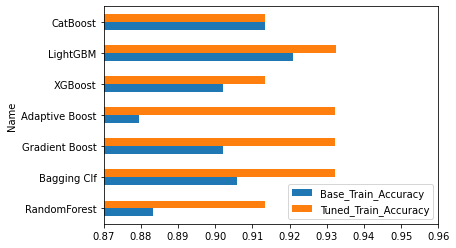

In [89]:
df_summary.plot.barh(x='Name',y=['Base_Train_Accuracy','Tuned_Train_Accuracy'])
plt.xlim(0.87,0.96)